<div class="alert alert-info" role="alert">
  <hr> <center> <font size="+3.5"> <b> Behavior on large area & L2RPN agent </b> </font> </center> <hr>
</div>

<a class="anchor" id="nutshell"></a>



<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Setting-up-grid-simulation-environment-and-grid-snapshot" data-toc-modified-id="Setting-up-grid-simulation-environment-and-grid-snapshot-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setting up grid simulation environment and grid snapshot</a></span><ul class="toc-item"><li><span><a href="#Grid-simulation-environment" data-toc-modified-id="Grid-simulation-environment-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Grid simulation environment</a></span></li><li><span><a href="#Overload-Graph" data-toc-modified-id="Overload-Graph-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Overload Graph</a></span></li><li><span><a href="#Create-AlphaDeesp" data-toc-modified-id="Create-AlphaDeesp-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Create AlphaDeesp</a></span></li></ul></li><li><span><a href="#Next-overloaded-situation-at-step-235" data-toc-modified-id="Next-overloaded-situation-at-step-235-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Next overloaded situation at step 235</a></span><ul class="toc-item"><li><span><a href="#Recover-base-topo-at-substation-16" data-toc-modified-id="Recover-base-topo-at-substation-16-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Recover base topo at substation 16</a></span></li></ul></li><li><span><a href="#New-situation-at-step-415" data-toc-modified-id="New-situation-at-step-415-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>New situation at step 415</a></span></li><li><span><a href="#New-overload-at-steo-477-&amp;-Recover-Topo-Sub-16" data-toc-modified-id="New-overload-at-steo-477-&amp;-Recover-Topo-Sub-16-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>New overload at steo 477 &amp; Recover Topo Sub 16</a></span></li><li><span><a href="#Reapply-topo-sub-16-at-step-737" data-toc-modified-id="Reapply-topo-sub-16-at-step-737-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Reapply topo sub 16 at step 737</a></span></li><li><span><a href="#Solve-multi-overloads-at-step-752" data-toc-modified-id="Solve-multi-overloads-at-step-752-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Solve multi overloads at step 752</a></span></li><li><span><a href="#Try-to-solve-it---hard-multi-overloads-tat-step-757" data-toc-modified-id="Try-to-solve-it---hard-multi-overloads-tat-step-757-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Try to solve it - hard multi overloads tat step 757</a></span></li><li><span><a href="#Running-the-automated-agent" data-toc-modified-id="Running-the-automated-agent-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Running the automated agent</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

In this notebook, you will use the expert system over a difficult scenario for different kind of overloads. You will be able to analyse its results and go quite far. In the end you will also be able to run the automated version of this agent which is available on L2PRN baselines.

In [1]:
import configparser
import numpy as np
import os
from alphaDeesp.core.grid2op.Grid2opObservationLoader import Grid2opObservationLoader
from alphaDeesp.core.grid2op.Grid2opSimulation import Grid2opSimulation

/home/marotant/dev/ExpertOp4Grid/venv_expert4grid/lib/python3.8/site-packages/grid2op/Backend/pandaPowerBackend.py:32: UserWarning: Numba cannot be loaded. You will gain possibly massive speed if installing it by 
	/home/marotant/dev/ExpertOp4Grid/venv_expert4grid/bin/python -m pip install numba

  warnings.warn(


# Setting up grid simulation environment and grid snapshot 

## Grid simulation environment

In [2]:
from lightsim2grid import LightSimBackend
import grid2op
from grid2op.Agent.recoPowerlineAgent import RecoPowerlineAgent

config = configparser.ConfigParser()
config.read("../alphaDeesp/ressources/config/config.ini")
param_folder = "data/icaps_2021/"

chronicscenario=0
timestep=0
env_seed = 2118338672

env = grid2op.make(param_folder, backend=LightSimBackend(max_iter=30))
env.seed(env_seed)

# reset the env to apply the seed and start to the desired scenario
obs = env.reset()

#loader = Grid2opObservationLoader(param_folder)
#env, obs, action_space = loader.get_observation(chronic_scenario= chronicscenario, timestep=timestep)
observation_space = env.observation_space
action_space=env.action_space

reco_agent=RecoPowerlineAgent(env.action_space)

#from grid2op.Agent.greedyAgent import GreedyAgent
#greedy_agent=GreedyAgent(env.action_space)

/home/marotant/dev/ExpertOp4Grid/venv_expert4grid/lib/python3.8/site-packages/lightsim2grid/gridmodel/_aux_add_trafo.py:67: UserWarning: There were some Nan in the pp_net.trafo["tap_step_degree"], they have been replaced by 0
  warnings.warn("There were some Nan in the pp_net.trafo[\"tap_step_degree\"], they have been replaced by 0")
/home/marotant/dev/ExpertOp4Grid/venv_expert4grid/lib/python3.8/site-packages/lightsim2grid/gridmodel/_aux_add_slack.py:114: UserWarning: We found either some slack coefficient to be < 0. or they were all 0.We set them all to 1.0 to avoid such issues
  warnings.warn("We found either some slack coefficient to be < 0. or they were all 0."
/home/marotant/dev/ExpertOp4Grid/venv_expert4grid/lib/python3.8/site-packages/grid2op/Backend/backend.py:1967: RuntimeWarning: divide by zero encountered in divide
  p_s[sh_conn] *= (self._sh_vnkv[sh_conn] / sh_v[sh_conn]) ** 2
/home/marotant/dev/ExpertOp4Grid/venv_expert4grid/lib/python3.8/site-packages/grid2op/Backend/bac

let's run the environment up to the first intesreting overload

In [3]:
timestep_stop=131#153 #88
do_nothing_act=action_space({})
for t in range(timestep_stop):
    act=reco_agent.act(obs,None,False)
    obs,*_=env.step(act)

/tmp/ipykernel_12161/3332567725.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


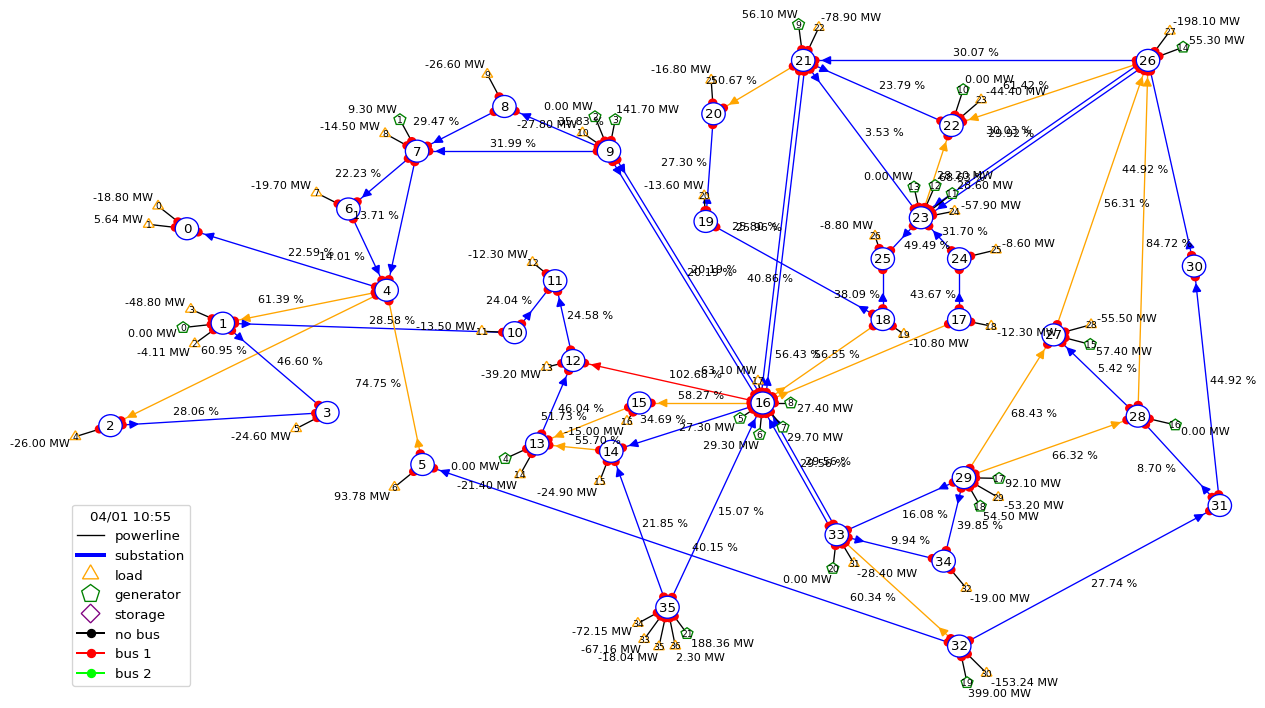

In [4]:
from grid2op.PlotGrid import PlotMatplot

obs=env.get_obs()

plot_helper = PlotMatplot(env.observation_space)
fig = plot_helper.plot_obs(obs)
fig.show()

In [5]:
ltc=[id for id in range(env.n_line) if obs.rho[id]>=1]
print("overload on line "+str(ltc[0])+" of "+str(obs.rho[ltc[0]])+" %")
ltc

overload on line 20 of 1.0268228 %


[20]

## Overload Graph

Loading it as it was in previous notebook

In [6]:
full_grid_layout=plot_helper.compute_grid_layout(observation_space)

layout=[tuple(value) for key,value in full_grid_layout.items() if "sub" in key]
layout+=layout #dounling the size for double bus bar

In [8]:
from alphaDeesp.main import generate_plot_folders
from alphaDeesp.core.graphsAndPaths import OverFlowGraph

sim = Grid2opSimulation(obs, action_space, observation_space, param_options=config["DEFAULT"], debug=False,
                                 ltc=ltc)

sim.layout=layout
g_over =  OverFlowGraph(sim.topo, ltc, sim.get_dataframe())#sim.build_graph_from_data_frame(ltc)


Number of generators of the powergrid: 22
Number of loads of the powergrid: 37
Number of powerline of the powergrid: 59
Number of elements connected to each substations in the powergrid: [ 3  6  3  3  6  3  3  6  3  7  3  3  4  5  4  3 17  3  4  3  3  8  5 10
  3  3  9  5  5  7  2  3  5  7  3  7]
Total number of elements: 177
    idx_or  idx_ex  init_flows  swapped  new_flows  new_flows_swapped  \
0        2       3       2.625    False      3.486              False   
1        4       2      28.625     True     29.486              False   
2        4       0      13.160     True     13.160              False   
3        1       3      22.025    False     21.161              False   
4        4       1      96.126     True    104.062              False   
5        6       4       3.757     True      5.307              False   
6        7       4      10.366     True     11.863              False   
7        7       6      23.507     True     25.065              False   
8        8     

self.default output path =  


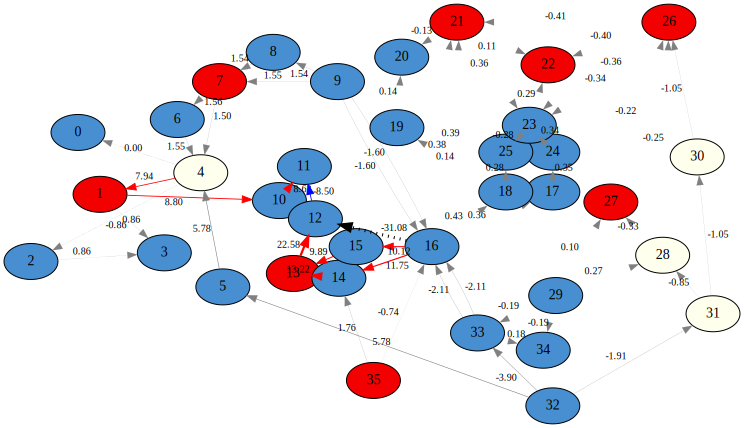

In [9]:
rescale_factor=150#for better layout, you can play with it to change the zoom level
layout_rescale=[(e[0]/rescale_factor,e[1]/rescale_factor) for e in sim.layout]
svg=g_over.plot(layout_rescale,save_folder="")

from IPython.display import SVG, display
SVG(svg)

With a more hierarchical flow representation

self.default output path =  


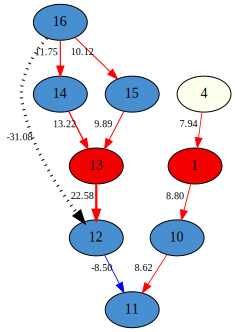

In [10]:
svg=g_over.plot(None,save_folder="",without_gray_edges=True)
from IPython.display import SVG, display
SVG(svg)

## Create AlphaDeesp 

This is the class similar to an agent where the intelligence lies to interpret this graph and make proposals.

In [11]:
from alphaDeesp.core.alphadeesp import AlphaDeesp
simulator_data = {"substations_elements": sim.get_substation_elements(),
                      "substation_to_node_mapping": sim.get_substation_to_node_mapping(),
                      "internal_to_external_mapping": sim.get_internal_to_external_mapping()}

alphadeesp = AlphaDeesp(g_over.get_graph(), sim.get_dataframe(), simulator_data,sim.substation_in_cooldown)

Constrained path created
In get_hubs(): c = 
################################################################
ConstrainedPath = [16, 12, 11] 
Details: (amont: [], constrained_edge: (16, 12, 0), aval: [(12, 11, 0)])
################################################################


In [12]:
ranked_combinations = alphadeesp.get_ranked_combinations()
expert_system_results, actions = sim.compute_new_network_changes(ranked_combinations)


##############################################################################
##########...........COMPUTE NEW NETWORK CHANGES..........####################
##############################################################################
########### Compute new network changes on node [16] with new topo [[1 1 1 1 2 1 1 1 2 1 2 1 1 1 2 2 1]] ###########
########### Compute new network changes on node [16] with new topo [[1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1]] ###########
########### Compute new network changes on node [16] with new topo [[1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 2 1]] ###########
########### Compute new network changes on node [16] with new topo [[1 1 1 1 2 1 1 1 2 1 1 1 1 1 2 2 1]] ###########
########### Compute new network changes on node [16] with new topo [[1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 2 1]] ###########
########### Compute new network changes on node [16] with new topo [[1 1 1 1 2 1 1 1 2 1 2 1 1 1 1 2 1]] ###########
########### Compute new network changes on node [16] with ne

In [13]:
expert_system_results

overflow ID Flows before Flows after Delta flows     Worsened line  \
0           20      -31.082     -20.300     -10.782                []   
1           20      -31.082       0.000     -31.082                []   
2           20      -31.082      12.523     -43.604      [14, 15, 16]   
3           20      -31.082       1.325     -32.406                []   
4           20      -31.082     -13.716     -17.365                []   
5           20      -31.082     -13.543     -17.538                []   
6           20      -31.082      24.427     -55.508      [14, 15, 16]   
7           20      -31.082     -21.690      -9.392                []   
8           20      -31.082     -16.208     -14.874                []   
9           20      -31.082       6.001     -37.083  [14, 15, 16, 32]   
10          20      -31.082     -10.875     -20.206                []   
11          20      -31.082       0.000     -31.082                []   
12          20      -31.082     -39.200       8.118              [20]   
13          20      -31.082     -35.802       4.720              [20]   
14          20      -31.082     -30.947      -0.135              [20]   
15          20      -31.082     -30.764      -0.318                []   
16          20      -31.082     -41.082      10.001              [20]   
17          20      -31.082     -29.217      -1.865                []   
18          20      -31.082     -28.907      -2.174                []   
19          20      -31.082     -57.590      26.509              [20]   
20          20      -31.082       0.000     -31.082                []   
21          20      -31.082     -38.593       7.512          [16, 20]   
22          20      -31.082     -31.144       0.062                []   
23          20      -31.082     -30.738      -0.344                []   
24          20      -31.082     -47.054      15.972      [16, 20, 21]   

   Prod redispatched Load redispatched  \
0              0.816            -0.000   
1                NaN               NaN   
2              4.131            -0.000   
3              3.304            -0.000   
4              1.464            -0.000   
5              1.725            -0.000   
6              8.124             0.000   
7              0.631            -0.000   
8              1.436            -0.000   
9              4.551            -0.000   
10             0.919             0.000   
11               NaN               NaN   
12             0.520             0.000   
13             0.499             0.000   
14             0.047             0.000   
15             0.117            -0.000   
16             0.328            -0.000   
17             0.131            -0.000   
18             0.192             0.000   
19             1.716            -0.000   
20               NaN               NaN   
21             0.780            -0.000   
22             0.034            -0.000   
23             0.192             0.000   
24             2.341            -0.000   

                           Internal Topology applied   \
0   [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, ...   
1   [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2   [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...   
3   [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, ...   
4   [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...   
5   [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, ...   
6   [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...   
7   [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ...   
8   [0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, ...   
9   [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...   
10                                       [0, 0, 1, 1]   
11                                       [0, 1, 1, 0]   
12                                       [0, 1, 0, 1]   
13                                    [0, 1, 1, 0, 1]   
14                                    [0, 0, 0, 1, 1]   
15                                    [0, 1, 1, 0, 0]   
16                                    [0, 

We choose the first effective action at substation 16 as it is smoother in terms of flow redispatch than the ones after (-10MWs). Actions at substations 12 and 13 would also have been effective, but they are smaller substations, so possibly a bit less robust to future unexpected events.

This action will:
	 - NOT change anything to the injections
	 - NOT perform any redispatching action
	 - NOT modify any storage capacity
	 - NOT perform any curtailment
	 - NOT force any line status
	 - NOT switch any line status
	 - NOT switch anything in the topology
	 - Set the bus of the following element(s):
	 	 - Assign bus 1 to line (extremity) id 17 [on substation 16]
	 	 - Assign bus 1 to line (extremity) id 18 [on substation 16]
	 	 - Assign bus 2 to line (extremity) id 19 [on substation 16]
	 	 - Assign bus 2 to line (extremity) id 20 [on substation 16]
	 	 - Assign bus 1 to line (extremity) id 21 [on substation 16]
	 	 - Assign bus 1 to line (origin) id 22 [on substation 16]
	 	 - Assign bus 1 to line (origin) id 23 [on substation 16]
	 	 - Assign bus 1 to line (origin) id 27 [on substation 16]
	 	 - Assign bus 2 to line (origin) id 28 [on substation 16]
	 	 - Assign bus 1 to line (origin) id 48 [on substation 16]
	 	 - Assign bus 2 to line (origin) id 49 [on substation 16]

/tmp/ipykernel_12161/200107047.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


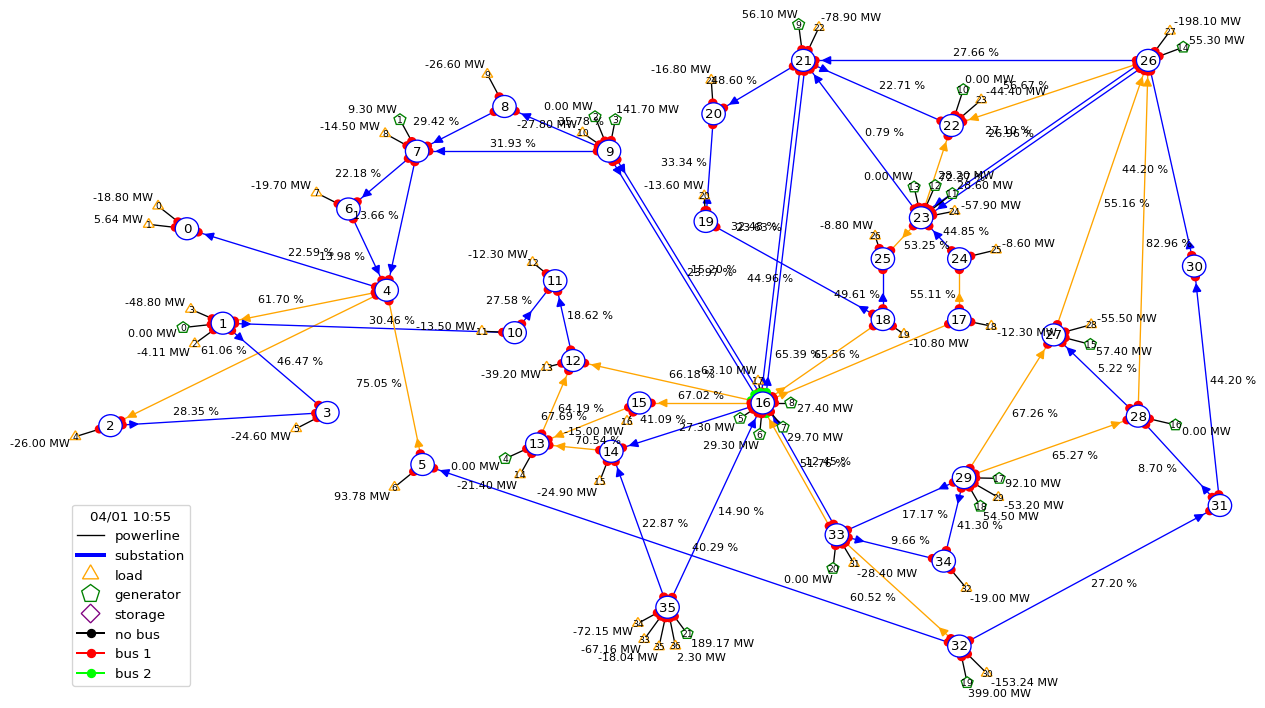

In [14]:
id_act=0
act=actions[id_act]
print(act)

obs_sim,reward,done,info=obs.simulate(act,time_step=0)
print(info)

# if you want to plot all the observation
fig = plot_helper.plot_obs(obs_sim)
fig.show()

In [15]:
obs,*_=env.step(act)

In [16]:
#fig = plot_helper.plot_obs(obs)
#fig.show()

# Next overloaded situation at step 235

In [17]:
do_nothing_act=action_space({})
while np.max(obs.rho)<1:
    act=reco_agent.act(obs,None,False)
    obs,*_=env.step(act)

print("new overloaded timestep: "+str(obs.current_step))

new overloaded timestep: 235


/tmp/ipykernel_12161/758305225.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


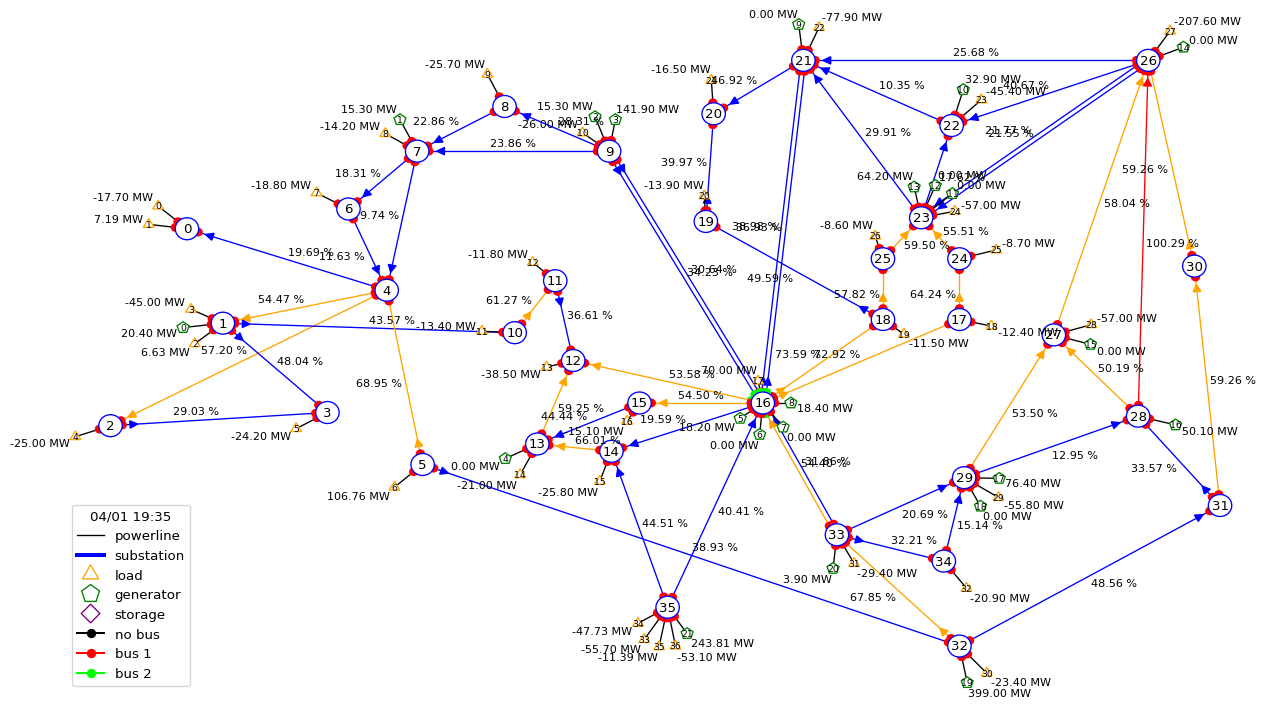

In [18]:
fig = plot_helper.plot_obs(obs)
fig.show()

In [19]:
ltc=[id for id in range(env.n_line) if obs.rho[id]>=1]
print("overload on line "+str(ltc[0])+" of "+str(obs.rho[ltc[0]])+" %")
ltc

overload on line 41 of 1.0028924 %


[41]

In [21]:
sim = Grid2opSimulation(obs, action_space, observation_space, param_options=config["DEFAULT"], debug=False,
                                 ltc=ltc)

sim.layout=layout
g_over =  OverFlowGraph(sim.topo, ltc, sim.get_dataframe())#sim.build_graph_from_data_frame(ltc)


Number of generators of the powergrid: 22
Number of loads of the powergrid: 37
Number of powerline of the powergrid: 59
Number of elements connected to each substations in the powergrid: [ 3  6  3  3  6  3  3  6  3  7  3  3  4  5  4  3 17  3  4  3  3  8  5 10
  3  3  9  5  5  7  2  3  5  7  3  7]
Total number of elements: 177
    idx_or  idx_ex  init_flows  swapped  new_flows  new_flows_swapped  \
0        2       3       0.727    False      0.757              False   
1        4       2      25.727     True     25.757              False   
2        4       0      10.510     True     10.510              False   
3        1       3      23.526    False     23.496              False   
4        4       1      74.356     True     74.639              False   
5        6       4       0.532     True      0.226              False   
6        7       4       6.932     True      6.636              False   
7        7       6      19.369     True     19.062              False   
8        8     

self.default output path =  


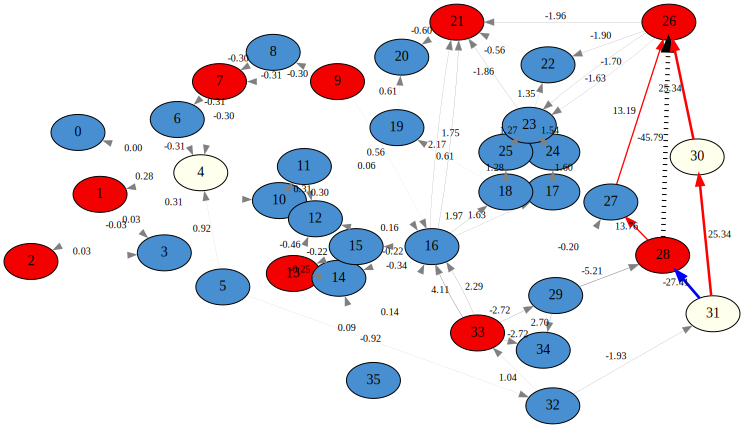

In [22]:
rescale_factor=150#for better layout, you can play with it to change the zoom level
layout_rescale=[(e[0]/rescale_factor,e[1]/rescale_factor) for e in sim.layout]
svg=g_over.plot(layout_rescale,save_folder="")

from IPython.display import SVG, display
SVG(svg)

With a more hierarchical flow representation

self.default output path =  


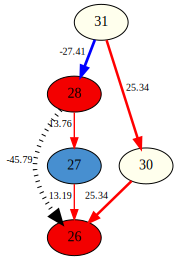

In [23]:
svg=g_over.plot(None,save_folder="",without_gray_edges=True)
from IPython.display import SVG, display
SVG(svg)

In [24]:
simulator_data = {"substations_elements": sim.get_substation_elements(),
                      "substation_to_node_mapping": sim.get_substation_to_node_mapping(),
                      "internal_to_external_mapping": sim.get_internal_to_external_mapping()}

alphadeesp = AlphaDeesp(g_over.get_graph(), sim.get_dataframe(), simulator_data,sim.substation_in_cooldown)

Constrained path created
In get_hubs(): c = 
################################################################
ConstrainedPath = [31, 28, 26] 
Details: (amont: [(31, 28, 0)], constrained_edge: (28, 26, 0), aval: [])
################################################################


In [25]:
ranked_combinations = alphadeesp.get_ranked_combinations()
expert_system_results, actions = sim.compute_new_network_changes(ranked_combinations)


##############################################################################
##########...........COMPUTE NEW NETWORK CHANGES..........####################
##############################################################################
########### Compute new network changes on node [26] with new topo [[1 2 2 1 2 2 1 2 2]] ###########
########### Compute new network changes on node [26] with new topo [[1 2 2 1 2 2 2 2 2]] ###########
########### Compute new network changes on node [26] with new topo [[1 1 1 2 1 1 2 1 1]] ###########
########### Compute new network changes on node [26] with new topo [[1 1 1 2 1 1 1 2 1]] ###########
########### Compute new network changes on node [26] with new topo [[1 2 2 1 2 2 1 1 2]] ###########
########### Compute new network changes on node [26] with new topo [[1 2 2 1 2 2 2 1 2]] ###########
########### Compute new network changes on node [26] with new topo [[1 1 1 2 1 1 2 2 1]] ###########
########### Compute new network changes on node [26] wi

In [26]:
expert_system_results

overflow ID Flows before Flows after Delta flows Worsened line  \
0           41      -45.788     -22.993     -22.795            []   
1           41      -45.788      -0.000     -45.788            []   
2           41      -45.788     -22.332     -23.457            []   
3           41      -45.788     -23.940     -21.849          [39]   
4           41      -45.788     -32.352     -13.437            []   
5           41      -45.788     -24.971     -20.817          [39]   
6           41      -45.788     -31.259     -14.529            []   
7           41      -45.788     -31.502     -14.287            []   
8           41      -45.788     -23.992     -21.796            []   
9           41      -45.788     -32.558     -13.231            []   
10          41      -45.788     -34.691     -11.097            []   
11          41      -45.788      27.039     -72.828          [43]   
12          41      -45.788     -10.184     -35.605            []   
13          41      -45.788     -50.584       4.795          [41]   
14          41      -45.788     -48.914       3.125          [41]   
15          41      -45.788     -43.100      -2.689          [43]   
16          41      -45.788     -49.358       3.570          [41]   
17          41      -45.788     -49.261       3.472          [41]   
18          41      -45.788     -29.487     -16.302          [43]   
19          41      -45.788     -61.600      15.811          [41]   
20          41      -45.788     -45.798       0.009            []   
21          41      -45.788     -47.755       1.967            []   
22          41      -45.788     -47.755       1.966            []   
23          41      -45.788     -57.734      11.945          [41]   
24          41      -45.788     -45.838       0.049          [43]   
25          41      -45.788     -45.823       0.035          [43]   
26          41      -45.788     -74.449      28.661          [41]   
27          41      -45.788     -74.527      28.738      [40, 41]   
28          41      -45.788     -54.167       8.379      [41, 43]   
29          41      -45.788     -45.788       0.000            []   
30          41      -45.788     -45.788       0.000            []   

   Prod redispatched Load redispatched   Internal Topology applied   \
0              0.796             0.000  [0, 1, 1, 0, 1, 1, 0, 1, 1]   
1              0.954            -0.000  [0, 1, 1, 0, 1, 1, 1, 1, 1]   
2              0.066            -0.000  [0, 0, 0, 1, 0, 0, 1, 0, 0]   
3              0.094            -0.000  [0, 0, 0, 1, 0, 0, 0, 1, 0]   
4              0.664            -0.000  [0, 1, 1, 0, 1, 1, 0, 0, 1]   
5              0.685            -0.000  [0, 1, 1, 0, 1, 1, 1, 0, 1]   
6              0.146            -0.000  [0, 0, 0, 1, 0, 0, 1, 1, 0]   
7              0.147            -0.000  [0, 0, 0, 1, 1, 0, 1, 0, 0]   
8              0.101            -0.000  [0, 0, 0, 1, 1, 0, 0, 0, 0]   
9              0.659            -0.000  [0, 1, 1, 0, 0, 1, 0, 1, 1]   
10             0.014            -0.000              [0, 1, 1, 0, 0]   
11             2.032            -0.000              [0, 0, 1, 1, 0]   
12             0.038            -0.000              [0, 1, 1, 1, 0]   
13             0.100            -0.000              [0, 0, 1, 0, 1]   
14             0.005             0.000              [0, 1, 1, 0, 1]   
15             0.681            -0.000              [0, 0, 1, 1, 1]   
16             0.045            -0.000              [0, 1, 0, 1, 1]   
17             0.072            -0.000              [0, 0, 0, 1, 1]   
18             0.078            -0.000              [0, 1, 0, 0, 1]   
19             0.338            -0.000              [0, 1, 0, 1, 0]   
20             0.131             0.000              [0, 1, 1, 0, 1]   
21             0.016            -0.000              [0, 0, 0, 1, 1]   
22             0.021            -0.000              [0, 1, 1, 0, 0]   
23             0.218            -0.000              [0, 1, 1, 1, 0]   
24             0.26

We choose the effective action at substation 28 as it is smoother in terms of flow redispatch

This action will:
	 - NOT change anything to the injections
	 - NOT perform any redispatching action
	 - NOT modify any storage capacity
	 - NOT perform any curtailment
	 - NOT force any line status
	 - NOT switch any line status
	 - NOT switch anything in the topology
	 - Set the bus of the following element(s):
	 	 - Assign bus 2 to line (extremity) id 41 [on substation 28]
	 	 - Assign bus 1 to line (extremity) id 42 [on substation 28]
	 	 - Assign bus 2 to line (origin) id 44 [on substation 28]
	 	 - Assign bus 1 to line (extremity) id 57 [on substation 28]
	 	 - Assign bus 1 to generator id 16 [on substation 28]
	 - Not raise any alarm


/tmp/ipykernel_12161/2522889618.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


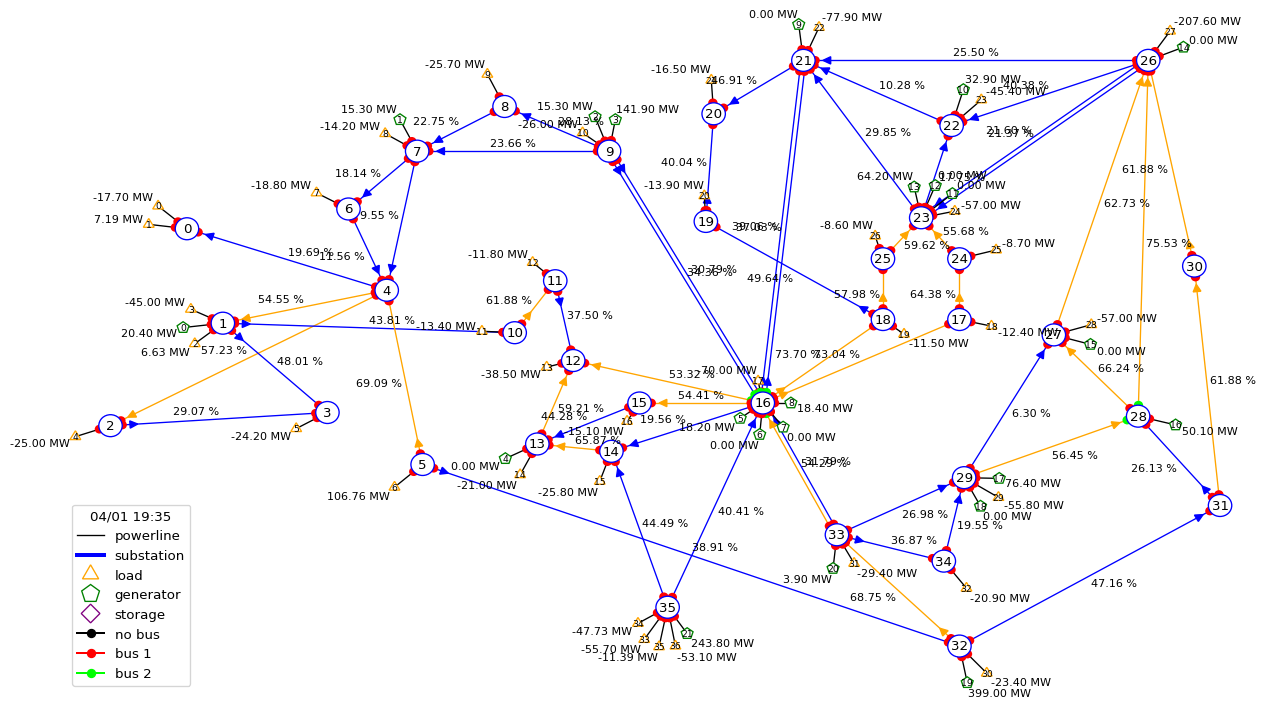

In [27]:
id_act=10
act=actions[id_act]
print(act)

obs_sim,*_=obs.simulate(act,time_step=0)

# if you want to plot all the observation
fig = plot_helper.plot_obs(obs_sim)
fig.show()

In [28]:
obs,*_=env.step(act)

In [29]:
#fig = plot_helper.plot_obs(obs)
#fig.show()

## Recover base topo at substation 16

We probably don't need the remedial action applied at substation 16 as flow usage are around 50% for the lines

/tmp/ipykernel_12161/4163217164.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


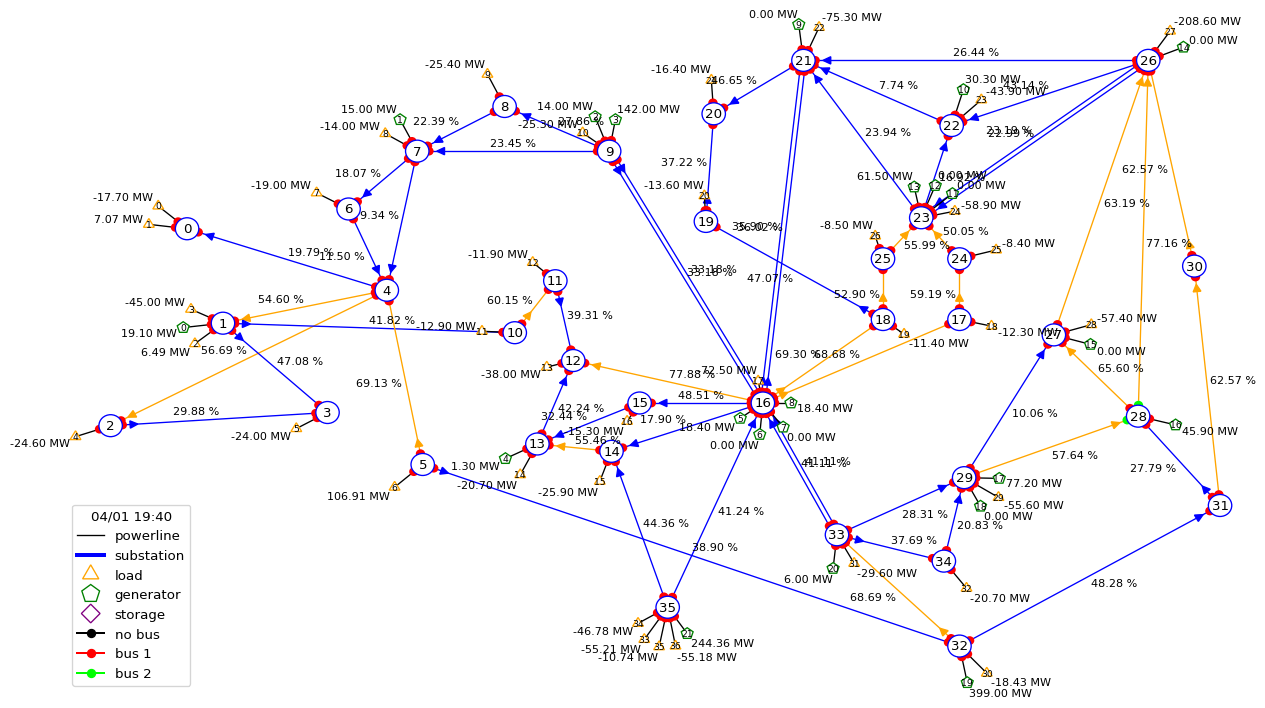

In [31]:
sub_id=16
topo_sub_16=obs.sub_topology(sub_id)
topo_sub_16_meshed=[1 for el in topo_sub_16]


action_def = {"set_bus": {"substations_id": [(sub_id, topo_sub_16_meshed)]}}
act = env.action_space(action_def)

obs_sim,*_=obs.simulate(act,time_step=0)

# if you want to plot all the observation
fig = plot_helper.plot_obs(obs_sim)
fig.show()

Indeed removing the action keep the flows under 80% so that's fine and we recover the base topology

In [32]:
obs,*_=env.step(act)

# New situation at step 415

In [33]:
while np.max(obs.rho)<1:
    act=reco_agent.act(obs,None,False)
    obs,*_=env.step(act)
    
print("new overloaded timestep: "+str(obs.current_step))

/tmp/ipykernel_12161/758305225.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


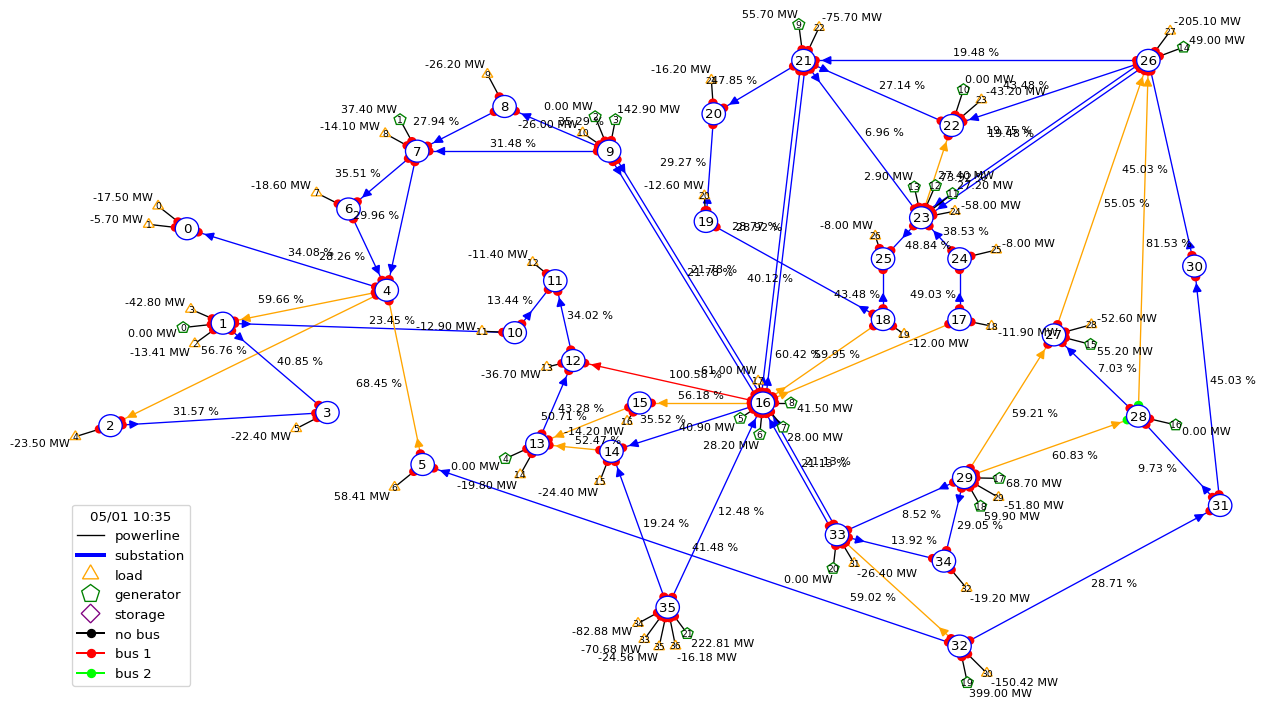

In [35]:
fig = plot_helper.plot_obs(obs)
fig.show()

Our line get's overloaded again, let's manage it

In [36]:
ltc=[id for id in range(env.n_line) if obs.rho[id]>=1]
print("overload on line "+str(ltc[0])+" of "+str(obs.rho[ltc[0]])+" %")
ltc

overload on line 20 of 1.0057732 %


[20]

In [38]:
sim = Grid2opSimulation(obs, action_space, observation_space, param_options=config["DEFAULT"], debug=False,
                                 ltc=ltc)

sim.layout=layout
g_over =  OverFlowGraph(sim.topo, ltc, sim.get_dataframe())#sim.build_graph_from_data_frame(ltc)


Number of generators of the powergrid: 22
Number of loads of the powergrid: 37
Number of powerline of the powergrid: 59
Number of elements connected to each substations in the powergrid: [ 3  6  3  3  6  3  3  6  3  7  3  3  4  5  4  3 17  3  4  3  3  8  5 10
  3  3  9  5  5  7  2  3  5  7  3  7]
Total number of elements: 177
    idx_or  idx_ex  init_flows  swapped  new_flows  new_flows_swapped  \
0        2       3       3.056    False      3.908              False   
1        4       2      26.556     True     27.408              False   
2        4       0      23.200     True     23.200              False   
3        1       3      19.382    False     18.529              False   
4        4       1      92.812     True    100.652              False   
5        6       4      18.425     True     19.950              False   
6        7       4      24.127     True     25.596              False   
7        7       6      37.201     True     38.747              False   
8        8     

self.default output path =  


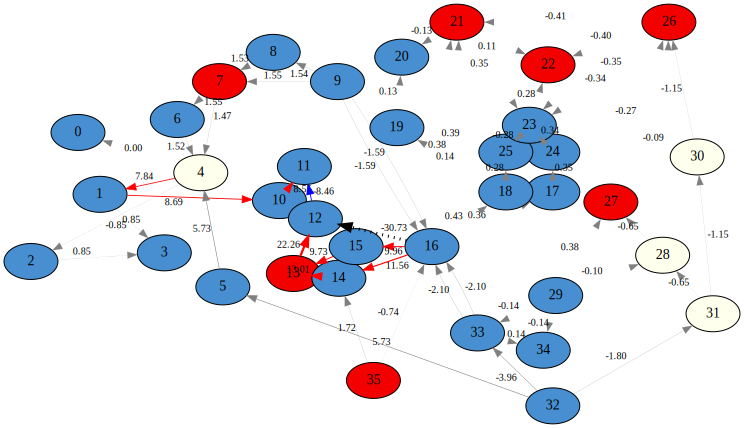

In [39]:
rescale_factor=150#for better layout, you can play with it to change the zoom level
layout_rescale=[(e[0]/rescale_factor,e[1]/rescale_factor) for e in sim.layout]
svg=g_over.plot(layout_rescale,save_folder="")

from IPython.display import SVG, display
SVG(svg)

With a more hierarchical flow representation

self.default output path =  


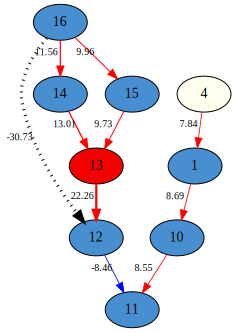

In [40]:
svg=g_over.plot(None,save_folder="",without_gray_edges=True)
from IPython.display import SVG, display
SVG(svg)

In [41]:
simulator_data = {"substations_elements": sim.get_substation_elements(),
                      "substation_to_node_mapping": sim.get_substation_to_node_mapping(),
                      "internal_to_external_mapping": sim.get_internal_to_external_mapping()}

alphadeesp = AlphaDeesp(g_over.get_graph(), sim.get_dataframe(), simulator_data,sim.substation_in_cooldown)

Constrained path created
In get_hubs(): c = 
################################################################
ConstrainedPath = [16, 12, 11] 
Details: (amont: [], constrained_edge: (16, 12, 0), aval: [(12, 11, 0)])
################################################################


In [42]:
ranked_combinations = alphadeesp.get_ranked_combinations()
expert_system_results, actions = sim.compute_new_network_changes(ranked_combinations)


##############################################################################
##########...........COMPUTE NEW NETWORK CHANGES..........####################
##############################################################################
########### Compute new network changes on node [16] with new topo [[1 1 1 1 2 1 1 1 2 1 2 1 1 1 1 2 1]] ###########
########### Compute new network changes on node [16] with new topo [[1 1 1 1 2 1 1 1 2 1 2 1 1 1 2 2 1]] ###########
########### Compute new network changes on node [16] with new topo [[1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 2 1]] ###########
########### Compute new network changes on node [16] with new topo [[1 1 1 1 2 1 1 1 1 1 2 1 1 1 2 2 1]] ###########
########### Compute new network changes on node [16] with new topo [[1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 2 1]] ###########
########### Compute new network changes on node [16] with new topo [[1 1 1 1 2 1 1 1 2 1 1 1 1 1 2 2 1]] ###########
########### Compute new network changes on node [16] with ne

In [43]:
expert_system_results

overflow ID Flows before Flows after Delta flows Worsened line  \
0           20      -30.727     -11.068     -19.659            []   
1           20      -30.727     -18.478     -12.249            []   
2           20      -30.727     -11.385     -19.341            []   
3           20      -30.727     -20.093     -10.633            []   
4           20      -30.727      10.401     -41.127  [14, 15, 16]   
5           20      -30.727       0.876     -31.603            []   
6           20      -30.727      24.543     -55.269  [14, 15, 16]   
7           20      -30.727       0.000     -30.727            []   
8           20      -30.727     -14.183     -16.544            []   
9           20      -30.727       0.000     -30.727            []   
10          20      -30.727     -12.687     -18.040            []   
11          20      -30.727       0.000     -30.727            []   
12          20      -30.727     -36.700       5.973          [20]   
13          20      -30.727     -35.317       4.590          [20]   
14          20      -30.727     -30.728       0.001          [20]   
15          20      -30.727     -30.569      -0.157            []   
16          20      -30.727     -40.886      10.159          [20]   
17          20      -30.727     -29.230      -1.496            []   
18          20      -30.727     -28.959      -1.768            []   
19          20      -30.727     -56.120      25.393          [20]   
20          20      -30.727       0.000     -30.727            []   
21          20      -30.727     -37.795       7.069      [16, 20]   
22          20      -30.727     -31.098       0.371            []   
23          20      -30.727     -30.257      -0.470            []   
24          20      -30.727     -46.111      15.384  [16, 20, 21]   

   Prod redispatched Load redispatched  \
0              2.124             0.000   
1              0.996             0.000   
2              1.761             0.000   
3              0.735             0.000   
4              3.609             0.000   
5              3.028            -0.000   
6              7.852             0.000   
7                NaN               NaN   
8              1.705             0.000   
9                NaN               NaN   
10             0.728            -0.000   
11               NaN               NaN   
12             0.396             0.000   
13             0.441            -0.000   
14             0.031             0.000   
15             0.105             0.000   
16             0.329            -0.000   
17             0.089            -0.000   
18             0.157             0.000   
19             1.573             0.000   
20               NaN               NaN   
21             0.673             0.000   
22             0.039             0.000   
23             0.214             0.000   
24             2.163             0.000   

                           Internal Topology applied   \
0   [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, ...   
1   [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, ...   
2   [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...   
3   [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ...   
4   [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...   
5   [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, ...   
6   [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...   
7   [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
8   [0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, ...   
9   [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
10                                       [0, 0, 1, 1]   
11                                       [0, 1, 1, 0]   
12                                       [0, 1, 0, 1]   
13                                    [0, 1, 1, 0, 1]   
14                                    [0, 0, 0, 1, 1]   
15                                    [0, 1, 1, 0, 0]   
16                                    [0, 1, 1, 1, 0]   
17                                    [0, 0, 1, 0, 1]   
18                              

We again apply a remedial action at substation 16

This action will:
	 - NOT change anything to the injections
	 - NOT perform any redispatching action
	 - NOT modify any storage capacity
	 - NOT perform any curtailment
	 - NOT force any line status
	 - NOT switch any line status
	 - NOT switch anything in the topology
	 - Set the bus of the following element(s):
	 	 - Assign bus 1 to line (extremity) id 17 [on substation 16]
	 	 - Assign bus 1 to line (extremity) id 18 [on substation 16]
	 	 - Assign bus 1 to line (extremity) id 19 [on substation 16]
	 	 - Assign bus 2 to line (extremity) id 20 [on substation 16]
	 	 - Assign bus 1 to line (extremity) id 21 [on substation 16]
	 	 - Assign bus 1 to line (origin) id 22 [on substation 16]
	 	 - Assign bus 1 to line (origin) id 23 [on substation 16]
	 	 - Assign bus 1 to line (origin) id 27 [on substation 16]
	 	 - Assign bus 2 to line (origin) id 28 [on substation 16]
	 	 - Assign bus 1 to line (origin) id 48 [on substation 16]
	 	 - Assign bus 2 to line (origin) id 49 [on substation 16]

/tmp/ipykernel_12161/2138353423.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


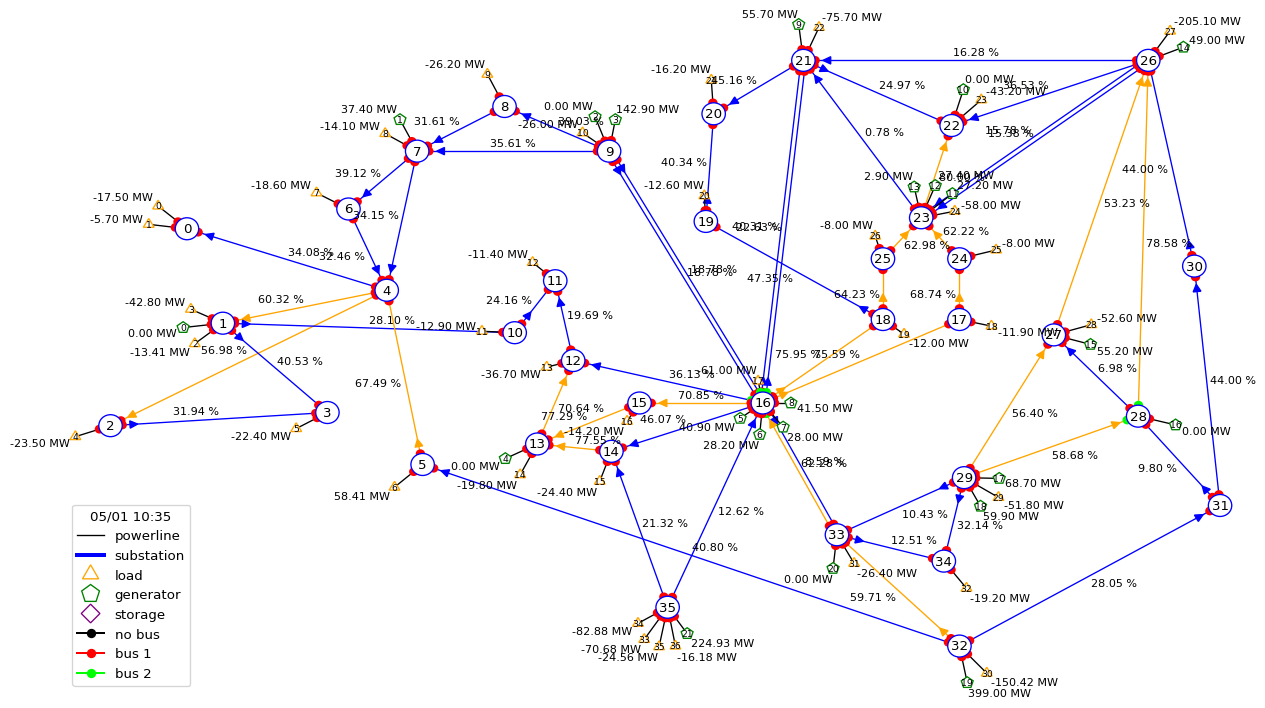

In [44]:
id_act=0
act=actions[id_act]
print(act)

obs_sim,*_=obs.simulate(act,time_step=0)

# if you want to plot all the observation
fig = plot_helper.plot_obs(obs_sim)
fig.show()

In [45]:
obs,*_=env.step(act)

In [46]:
#fig = plot_helper.plot_obs(obs)
#fig.show()

# New overload at steo 477 & Recover Topo Sub 16

In [47]:
while np.max(obs.rho)<1:
    act=reco_agent.act(obs,None,False)
    obs,*_=env.step(act)
    
print("new overloaded timestep: "+str(obs.current_step))

new overloaded timestep: 477


/tmp/ipykernel_12161/758305225.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


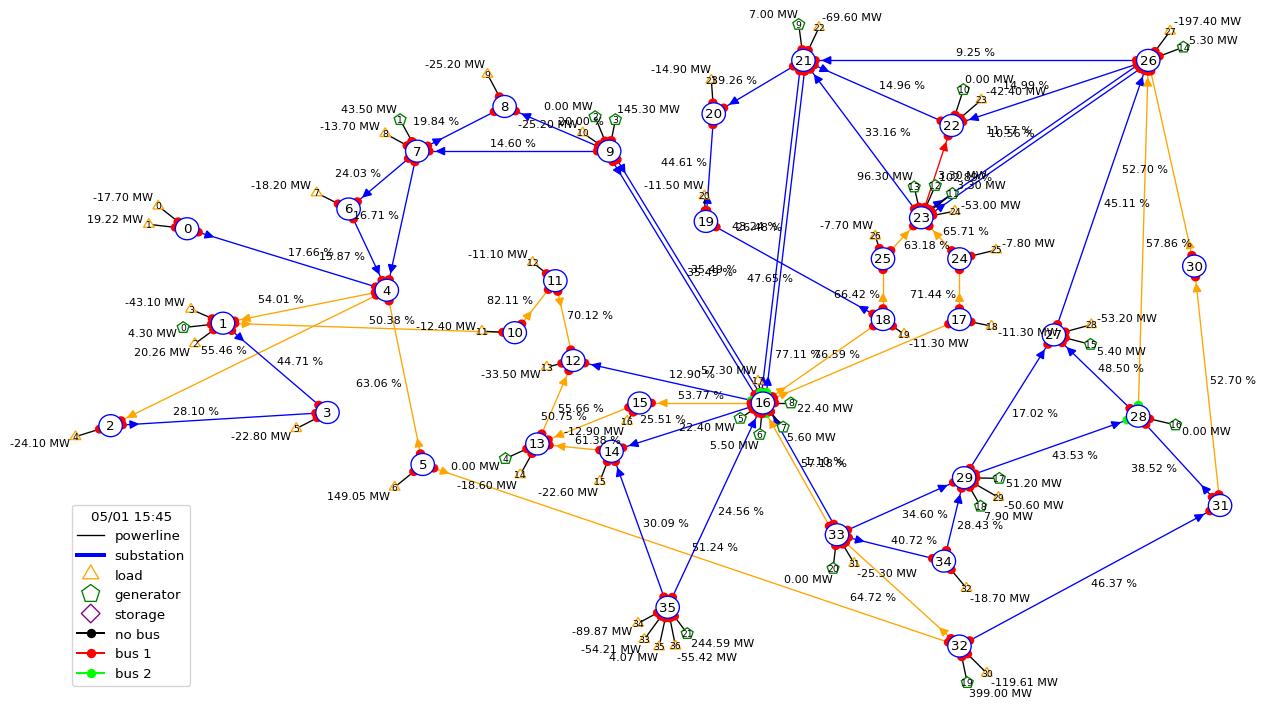

In [48]:
fig = plot_helper.plot_obs(obs)
fig.show()

/tmp/ipykernel_12161/4163217164.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


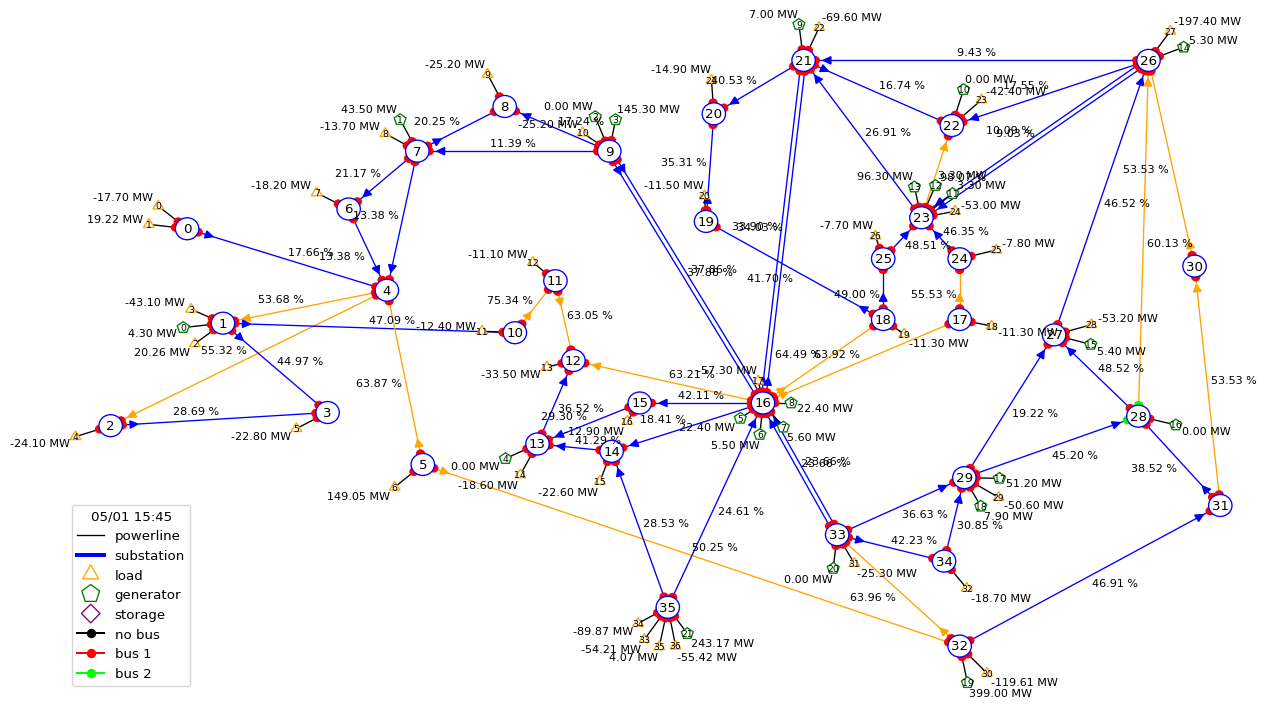

In [49]:
sub_id=16
topo_sub_16=obs.sub_topology(sub_id)
topo_sub_16_meshed=[1 for el in topo_sub_16]


action_def = {"set_bus": {"substations_id": [(sub_id, topo_sub_16_meshed)]}}
act = env.action_space(action_def)

obs_sim,*_=obs.simulate(act,time_step=0)

# if you want to plot all the observation
fig = plot_helper.plot_obs(obs_sim)
fig.show()

In [50]:
obs,*_=env.step(act)

# Reapply topo sub 16 at step 737

In [51]:
while np.max(obs.rho)<1:
    act=reco_agent.act(obs,None,False)
    obs,*_=env.step(act)
    
print("new overloaded timestep: "+str(obs.current_step))

new overloaded timestep: 737


/tmp/ipykernel_12161/758305225.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


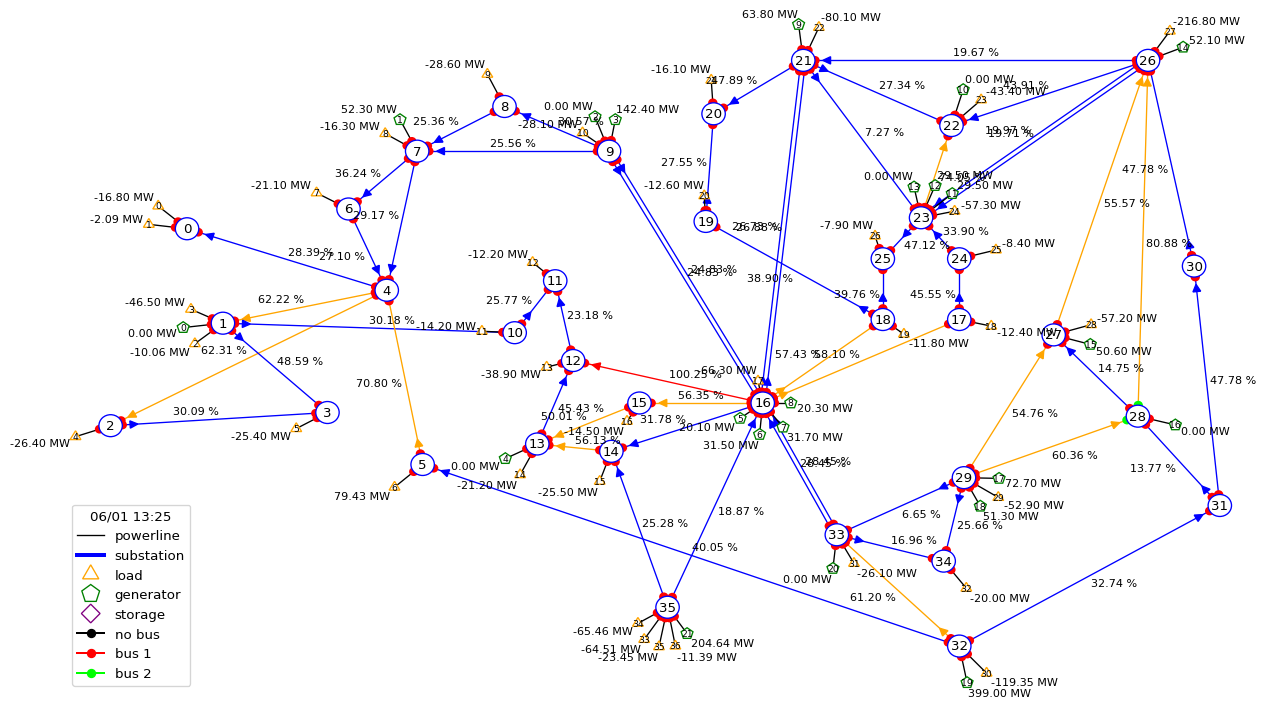

In [52]:
fig = plot_helper.plot_obs(obs)
fig.show()

/tmp/ipykernel_12161/2096098387.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


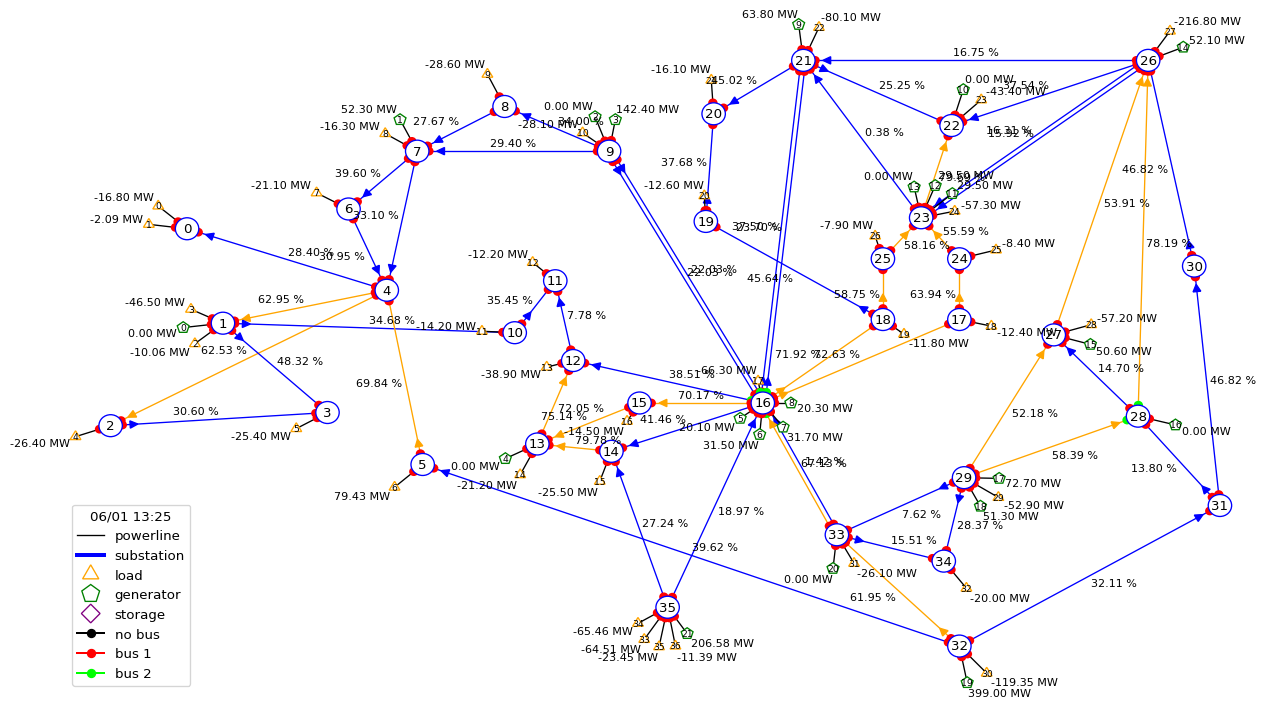

In [53]:
#topo_sub_16=obs.sub_topology(sub_id)
#topo_sub_16_meshed=[1 for el in topo_sub_16]
sub_id=16

action_def = {"set_bus": {"substations_id": [(sub_id, topo_sub_16)]}}
act = env.action_space(action_def)

obs_sim,*_=obs.simulate(act,time_step=0)

# if you want to plot all the observation
fig = plot_helper.plot_obs(obs_sim)
fig.show()

In [54]:
obs,*_=env.step(act)

# Solve multi overloads at step 752

In [55]:
while np.max(obs.rho)<1:
    act=reco_agent.act(obs,None,False)
    obs,*_=env.step(act)
    
print("new overloaded timestep: "+str(obs.current_step))

new overloaded timestep: 752


/tmp/ipykernel_12161/758305225.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


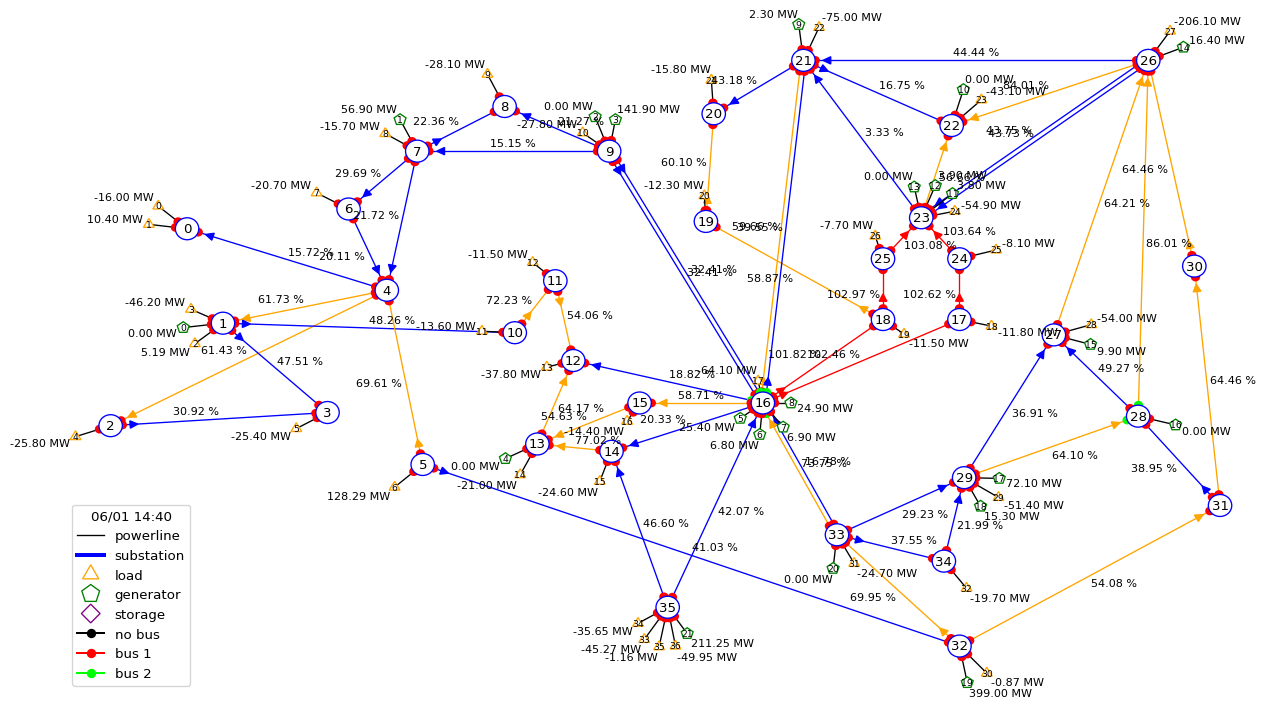

In [56]:
fig = plot_helper.plot_obs(obs)
fig.show()

In [59]:
ltc=[id for id in range(env.n_line) if obs.rho[id]>=1]
print("overload on line "+str(ltc[0])+" of "+str(obs.rho[ltc[0]])+" %")
ltc

overload on line 22 of 1.0246027 %


[22, 23, 32, 33, 34, 35]

There are many overloaded lines this time, but over two paralel corridors. We will build an overload distibution graph by cutting those two constrained paths. We chooses lines 22 and 23 for that that ges from substation 16 to substations 17 and 18.

In [60]:
obs.rho[ltc]

array([1.0246027, 1.0182309, 1.036398 , 1.0261899, 1.0308299, 1.0296639],
      dtype=float32)

In [61]:
ltc=[22,23] #reduced lines of interest first

In [62]:
#sub_id=34
#print(obs.line_ex_to_subid[sub_id])
#print(obs.line_or_to_subid[sub_id])

In [63]:
sim = Grid2opSimulation(obs, action_space, observation_space, param_options=config["DEFAULT"], debug=False,
                                 ltc=ltc)

sim.layout=layout
g_over =  OverFlowGraph(sim.topo, ltc, sim.get_dataframe())#sim.build_graph_from_data_frame(ltc)


Number of generators of the powergrid: 22
Number of loads of the powergrid: 37
Number of powerline of the powergrid: 59
Number of elements connected to each substations in the powergrid: [ 3  6  3  3  6  3  3  6  3  7  3  3  4  5  4  3 17  3  4  3  3  8  5 10
  3  3  9  5  5  7  2  3  5  7  3  7]
Total number of elements: 177
    idx_or  idx_ex  init_flows  swapped  new_flows  new_flows_swapped  \
0        2       3       3.357    False      3.215              False   
1        4       2      29.157     True     29.015              False   
2        4       0       5.600     True      5.600              False   
3        1       3      22.095    False     22.238              False   
4        4       1      99.606     True     98.271              False   
5        6       4      10.505     True     16.191              False   
6        7       4      17.243     True     22.734              False   
7        7       6      31.300     True     37.043              False   
8        7     

self.default output path =  


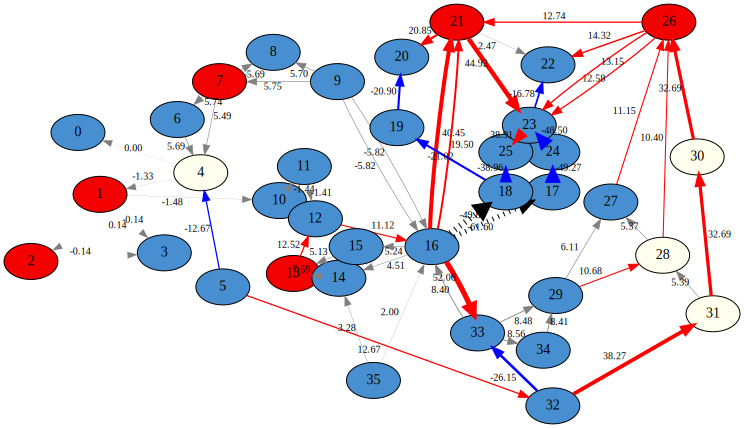

In [64]:
rescale_factor=150#for better layout, you can play with it to change the zoom level
layout_rescale=[(e[0]/rescale_factor,e[1]/rescale_factor) for e in sim.layout]
svg=g_over.plot(layout_rescale,save_folder="")

from IPython.display import SVG, display
SVG(svg)

With a more hierarchical flow representation

self.default output path =  


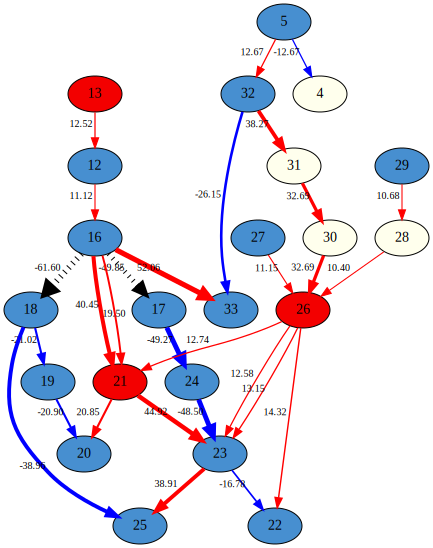

In [65]:
svg=g_over.plot(None,save_folder="",without_gray_edges=True)
from IPython.display import SVG, display
SVG(svg)

In [66]:
simulator_data = {"substations_elements": sim.get_substation_elements(),
                      "substation_to_node_mapping": sim.get_substation_to_node_mapping(),
                      "internal_to_external_mapping": sim.get_internal_to_external_mapping()}

alphadeesp = AlphaDeesp(g_over.get_graph(), sim.get_dataframe(), simulator_data,sim.substation_in_cooldown)

Constrained path created
In get_hubs(): c = 
################################################################
ConstrainedPath = [16, 18, 19, 20, 25] 
Details: (amont: [], constrained_edge: (16, 18, 0), aval: [(18, 19, 0), (19, 20, 0), (18, 25, 0)])
################################################################


In [67]:
ranked_combinations = alphadeesp.get_ranked_combinations()
expert_system_results, actions = sim.compute_new_network_changes(ranked_combinations)


##############################################################################
##########...........COMPUTE NEW NETWORK CHANGES..........####################
##############################################################################
########### Compute new network changes on node [16] with new topo [[1 1 1 1 2 2 2 1 1 1 2 2 1 1 1 1 1]] ###########
########### Compute new network changes on node [16] with new topo [[1 1 1 1 2 2 2 1 2 1 2 1 1 1 2 2 1]] ###########
########### Compute new network changes on node [16] with new topo [[1 1 1 1 2 2 1 1 2 1 1 1 1 1 1 2 1]] ###########
########### Compute new network changes on node [16] with new topo [[1 1 1 1 2 2 2 1 1 1 2 1 1 1 2 2 1]] ###########
########### Compute new network changes on node [16] with new topo [[1 1 1 1 2 2 2 1 1 1 2 1 1 1 2 1 1]] ###########
########### Compute new network changes on node [16] with new topo [[1 1 1 1 2 2 2 1 1 1 2 1 1 1 1 2 1]] ###########
########### Compute new network changes on node [16] with ne

In [68]:
expert_system_results

overflow ID Flows before Flows after Delta flows  \
0           22       49.853      30.990      18.863   
1           22       49.853      31.975      17.878   
2           22       49.853      -7.257      57.110   
3           22       49.853      31.154      18.699   
4           22       49.853      31.975      17.878   
5           22       49.853      24.172      25.680   
6           22       49.853      23.239      26.614   
7           22       49.853     -25.438      75.291   
8           22       49.853       8.097      41.756   
9           22       49.853      12.320      37.533   
10          22       49.853      62.341     -12.488   
11          22       49.853      55.522      -5.669   
12          22       49.853      53.822      -3.969   
13          22       49.853      52.919      -3.066   
14          22       49.853      50.005      -0.152   
15          22       49.853      50.248      -0.395   
16          22       49.853      50.094      -0.241   
17          22       49.853      51.119      -1.266   
18          22       49.853      53.875      -4.022   
19          22       49.853      50.110      -0.257   
20          22       49.853      50.935      -1.082   
21          22       49.853      53.505      -3.652   
22          22       49.853      50.754      -0.901   
23          22       49.853      53.233      -3.380   
24          22       49.853      44.871       4.982   
25          22       49.853      49.502       0.350   
26          22       49.853      51.515      -1.663   
27          22       49.853      49.919      -0.066   
28          22       49.853      51.454      -1.601   
29          22       49.853      49.892      -0.039   
30          22       49.853      53.286      -3.433   
31          22       49.853      50.721      -0.868   
32          22       49.853      50.658      -0.805   

                                        Worsened line Prod redispatched  \
0                                                  []             0.357   
1                                                [39]             1.233   
2    [11, 13, 14, 15, 16, 20, 23, 32, 34, 35, 39, 41]            10.317   
3                                                  []             0.176   
4                                                  []             0.445   
5                                                  []             2.110   
6                                                  []             1.209   
7   [23, 24, 25, 26, 27, 32, 33, 34, 36, 37, 38, 3...            12.008   
8                                        [34, 35, 39]             2.707   
9                            [15, 23, 34, 35, 39, 41]             3.595   
10                                   [22, 32, 33, 39]             1.500   
11                                   [22, 25, 32, 33]             0.689   
12                       [22, 25, 26, 32, 33, 34, 35]             1.691   
13                           [22, 23, 32, 33, 34, 35]             0.501   
14                                                 []             0.108   
15                                                 []             0.133   
16                                                 []             0.021   
17                                           [34, 39]             0.617   
18                       [22, 23, 32, 33, 34, 35, 39]             1.095   
19                                                 []             0.214   
20                                           [29, 34]             0.387   
21                       [22, 23, 32, 33, 34, 35, 39]             0.886   
22                                                 []             0.247   
23                       [22, 23, 32, 33, 34, 35, 39]             1.038   
24                                   [23, 31, 34, 35]             0.454   
25                                                 []             0.022   
26                                   [32, 34, 35, 39]             0.599   
27                              

Effective remedial actions are only found at substation 16 this time. We choose the first one as it is relatively smooth.

This action will:
	 - NOT change anything to the injections
	 - NOT perform any redispatching action
	 - NOT modify any storage capacity
	 - NOT perform any curtailment
	 - NOT force any line status
	 - NOT switch any line status
	 - NOT switch anything in the topology
	 - Set the bus of the following element(s):
	 	 - Assign bus 1 to line (extremity) id 17 [on substation 16]
	 	 - Assign bus 1 to line (extremity) id 18 [on substation 16]
	 	 - Assign bus 1 to line (extremity) id 19 [on substation 16]
	 	 - Assign bus 1 to line (extremity) id 20 [on substation 16]
	 	 - Assign bus 1 to line (extremity) id 21 [on substation 16]
	 	 - Assign bus 2 to line (origin) id 22 [on substation 16]
	 	 - Assign bus 2 to line (origin) id 23 [on substation 16]
	 	 - Assign bus 1 to line (origin) id 27 [on substation 16]
	 	 - Assign bus 1 to line (origin) id 28 [on substation 16]
	 	 - Assign bus 1 to line (origin) id 48 [on substation 16]
	 	 - Assign bus 2 to line (origin) id 49 [on substation 16]

/tmp/ipykernel_12161/2138353423.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


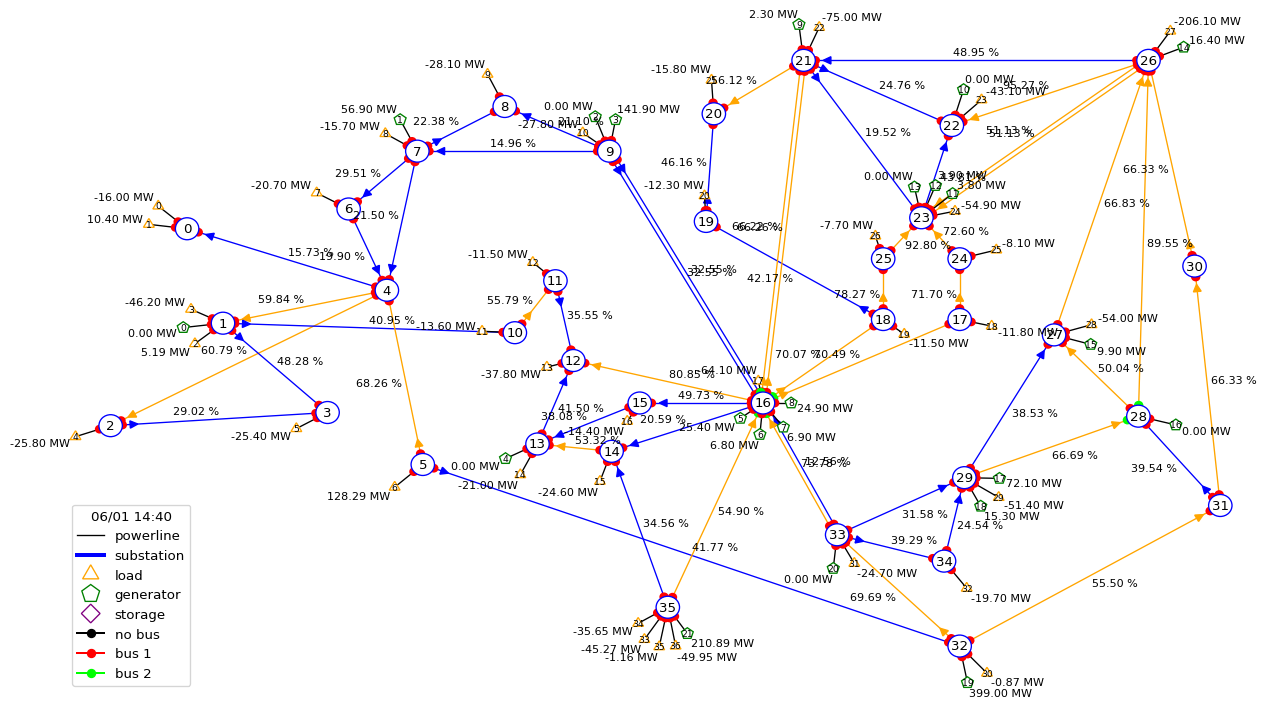

In [69]:
id_act=0
act=actions[id_act]
print(act)

obs_sim,*_=obs.simulate(act,time_step=0)

# if you want to plot all the observation
fig = plot_helper.plot_obs(obs_sim)
fig.show()

In [70]:
obs,*_=env.step(act)

# Try to solve it - hard multi overloads tat step 757

In [71]:
while np.max(obs.rho)<1:
    act=reco_agent.act(obs,None,False)
    obs,*_=env.step(act)
    
print("new overloaded timestep: "+str(obs.current_step))

new overloaded timestep: 757


/tmp/ipykernel_12161/758305225.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


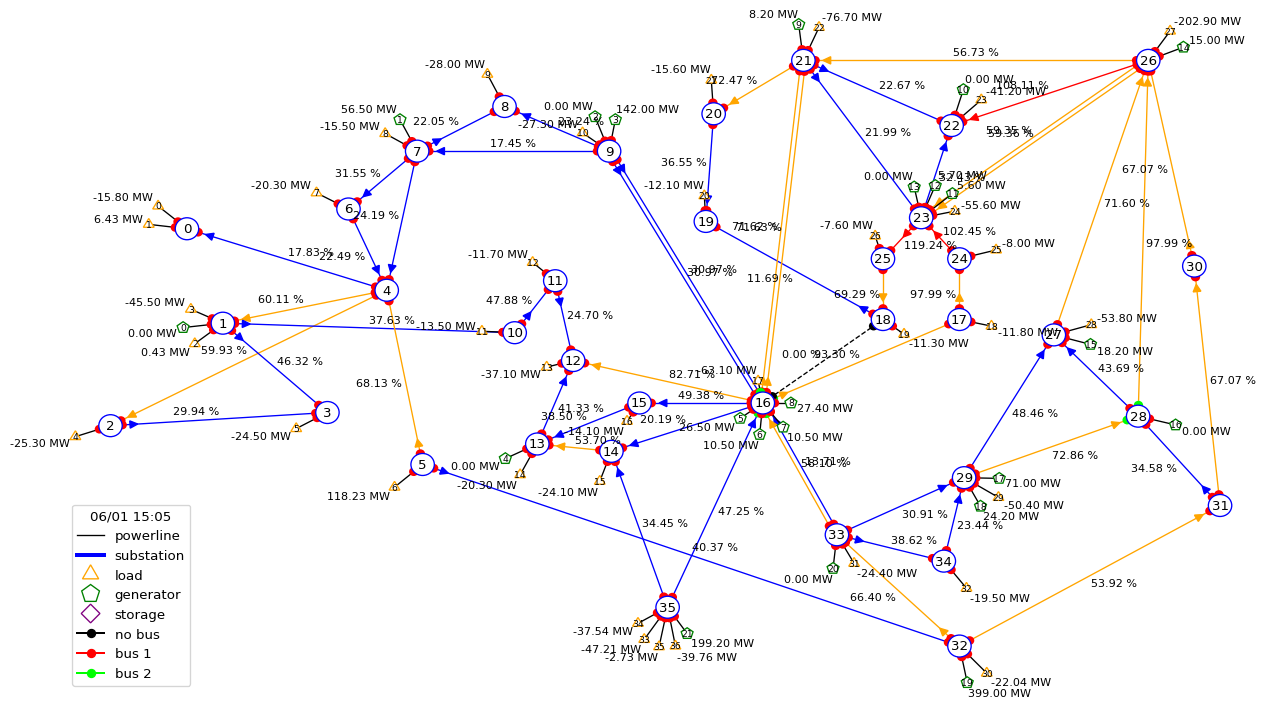

In [72]:
fig = plot_helper.plot_obs(obs)
fig.show()

In [73]:
ltc=[id for id in range(env.n_line) if obs.rho[id]>=1]
print("overload on line "+str(ltc[0])+" of "+str(obs.rho[ltc[0]])+" %")
ltc

overload on line 32 of 1.0244607 %


[32, 34, 39]

In [74]:
obs.rho[ltc]

array([1.0244607, 1.1923852, 1.0810839], dtype=float32)

We choose here to first managed the two overloads substation 23

In [75]:
ltc=[32,34] #reduced lines of interest first

In [76]:
#sub_id=34
#print(obs.line_ex_to_subid[sub_id])
#print(obs.line_or_to_subid[sub_id])

In [77]:
sim = Grid2opSimulation(obs, action_space, observation_space, param_options=config["DEFAULT"], debug=False,
                                 ltc=ltc)

sim.layout=layout
g_over =  OverFlowGraph(sim.topo, ltc, sim.get_dataframe())#sim.build_graph_from_data_frame(ltc)


Number of generators of the powergrid: 22
Number of loads of the powergrid: 37
Number of powerline of the powergrid: 59
Number of elements connected to each substations in the powergrid: [ 3  6  3  3  6  3  3  6  3  7  3  3  4  5  4  3 17  3  4  3  3  8  5 10
  3  3  9  5  5  7  2  3  5  7  3  7]
Total number of elements: 177
    idx_or  idx_ex  init_flows  swapped  new_flows  new_flows_swapped  \
0        2       3       2.902    False      2.912              False   
1        4       2      28.202     True     28.212              False   
2        4       0       9.370     True      9.370              False   
3        1       3      21.647    False     21.637              False   
4        4       1      95.274     True     95.362              False   
5        6       4      12.811     True     12.636              False   
6        7       4      19.328     True     19.159              False   
7        7       6      33.227     True     33.050              False   
8        7     

self.default output path =  


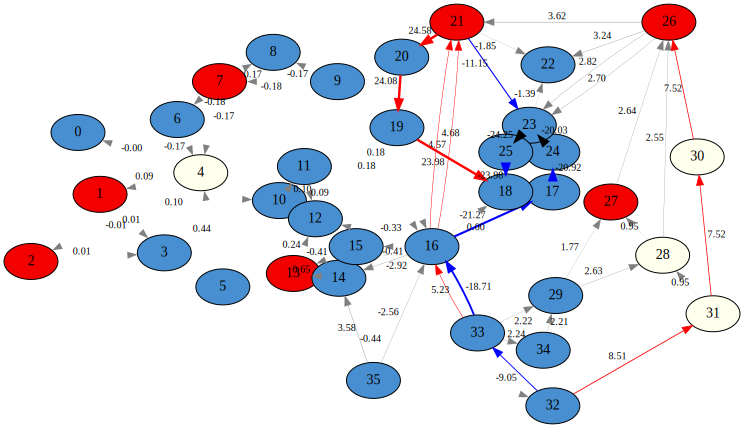

In [78]:
rescale_factor=150#for better layout, you can play with it to change the zoom level
layout_rescale=[(e[0]/rescale_factor,e[1]/rescale_factor) for e in sim.layout]
svg=g_over.plot(layout_rescale,save_folder="")

from IPython.display import SVG, display
SVG(svg)

With a more hierarchical flow representation

self.default output path =  


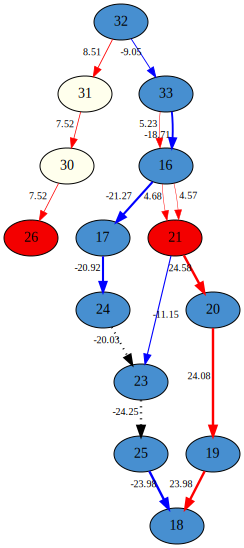

In [79]:
svg=g_over.plot(None,save_folder="",without_gray_edges=True)
from IPython.display import SVG, display
SVG(svg)

In [80]:
simulator_data = {"substations_elements": sim.get_substation_elements(),
                      "substation_to_node_mapping": sim.get_substation_to_node_mapping(),
                      "internal_to_external_mapping": sim.get_internal_to_external_mapping()}

alphadeesp = AlphaDeesp(g_over.get_graph(), sim.get_dataframe(), simulator_data,sim.substation_in_cooldown)

Constrained path created
In get_hubs(): c = 
################################################################
ConstrainedPath = [17, 24, 16, 33, 32, 23, 25, 18] 
Details: (amont: [(17, 24, 0), (16, 17, 0), (33, 16, 1), (32, 33, 0)], constrained_edge: (24, 23, 0), aval: [(25, 18, 0)])
################################################################
||||||||||||||||||||||||||| node [23] is not connected to a path to the constrained_edge.
||||||||||||||||||||||||||| node [23] is not connected to a path to the constrained_edge.
||||||||||||||||||||||||||| node [23] is not connected to a path to the constrained_edge.
||||||||||||||||||||||||||| node [23] is not connected to a path to the constrained_edge.
||||||||||||||||||||||||||| node [23] is not connected to a path to the constrained_edge.
||||||||||||||||||||||||||| node [23] is not connected to a path to the constrained_edge.
||||||||||||||||||||||||||| node [23] is not connected to a path to the constrained_edge.
||||||||||||||||||||

In [81]:
ranked_combinations = alphadeesp.get_ranked_combinations()
expert_system_results, actions = sim.compute_new_network_changes(ranked_combinations)


##############################################################################
##########...........COMPUTE NEW NETWORK CHANGES..........####################
##############################################################################
########### Compute new network changes on node [18] with new topo [[1 1 1 1]] ###########
########### Compute new network changes on node [18] with new topo [[1 1 2 2]] ###########
########### Compute new network changes on node [18] with new topo [[1 2 1 2]] ###########
########### Compute new network changes on node [18] with new topo [[1 2 2 1]] ###########
########### Compute new network changes on node [16] with new topo [[1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 2]] ###########
########### Compute new network changes on node [16] with new topo [[1 1 1 1 2 2 1 1 2 1 2 1 2 1 1 1 2]] ###########
########### Compute new network changes on node [16] with new topo [[1 1 1 1 2 2 2 1 1 1 1 1 1 1 2 2 2]] ###########
########### Compute new network changes on node

In [82]:
expert_system_results

overflow ID Flows before Flows after Delta flows  \
0           32      -20.030     -20.030       0.000   
1           32      -20.030     -19.948      -0.082   
2           32      -20.030     -19.979      -0.051   
3           32      -20.030       0.000     -20.030   
4           32      -20.030       0.000     -20.030   
5           32      -20.030     -13.861      -6.169   
6           32      -20.030       8.579     -28.609   
7           32      -20.030      16.349     -36.379   
8           32      -20.030       5.679     -25.708   
9           32      -20.030       7.255     -27.285   
10          32      -20.030       8.579     -28.609   
11          32      -20.030      -6.960     -13.069   
12          32      -20.030      -8.053     -11.977   
13          32      -20.030      -6.668     -13.362   
14          32      -20.030       8.738     -28.768   
15          32      -20.030     -24.188       4.158   
16          32      -20.030     -27.837       7.808   
17          32      -20.030       7.285     -27.315   
18          32      -20.030     -29.335       9.305   
19          32      -20.030      -0.950     -19.079   
20          32      -20.030     -25.184       5.154   
21          32      -20.030      -2.452     -17.578   
22          32      -20.030      -0.947     -19.082   
23          32      -20.030       0.745     -20.775   
24          32      -20.030       0.028     -20.057   
25          32      -20.030      -0.364     -19.666   
26          32      -20.030       0.000     -20.030   
27          32      -20.030      -3.096     -16.933   
28          32      -20.030       0.000     -20.030   
29          32      -20.030       0.000     -20.030   
30          32      -20.030       0.000     -20.030   
31          32      -20.030       0.000     -20.030   
32          32      -20.030     -20.124       0.094   
33          32      -20.030     -21.955       1.925   
34          32      -20.030     -24.690       4.660   
35          32      -20.030       5.600     -25.630   
36          32      -20.030     -18.500      -1.530   
37          32      -20.030     -17.139      -2.891   
38          32      -20.030     -16.855      -3.174   
39          32      -20.030      -3.945     -16.085   
40          32      -20.030     -17.261      -2.769   
41          32      -20.030     -17.267      -2.762   
42          32      -20.030     -16.932      -3.098   
43          32      -20.030       0.000     -20.030   
44          32      -20.030     -13.861      -6.169   
45          32      -20.030       8.579     -28.609   
46          32      -20.030      16.349     -36.379   
47          32      -20.030       5.679     -25.708   
48          32      -20.030       7.255     -27.285   
49          32      -20.030       8.579     -28.609   
50          32      -20.030      -6.960     -13.069   
51          32      -20.030      -8.053     -11.977   
52          32      -20.030      -6.668     -13.362   
53          32      -20.030     -28.996       8.966   
54          32      -20.030     -22.639       2.609   
55          32      -20.030     -21.459       1.429   
56          32      -20.030     -20.576       0.546   
57          32      -20.030     -30.266      10.237   
58          32      -20.030       0.000     -20.030   
59          32      -20.030     -23.526       3.496   
60          32      -20.030     -17.944      -2.086   
61          32      -20.030     -20.772       0.742   
62          32      -20.030     -20.784       0.755   

                       Worsened line Prod redispatched Load redispatched  \
0                                 []             0.000            -0.000   
1                           [25, 26]             0.397            -0.000   
2                                 []             0.015            -0.000   
3                                 []               NaN               NaN   
4                                 []               NaN               NaN   
5                       [2

Here we don't find any remedial action that solve the whole problem, but at least relieve one overload without worsening the others, with Topology simulated score and 3 (and not 4)

This action will:
	 - NOT change anything to the injections
	 - NOT perform any redispatching action
	 - NOT modify any storage capacity
	 - NOT perform any curtailment
	 - NOT force any line status
	 - NOT switch any line status
	 - NOT switch anything in the topology
	 - Set the bus of the following element(s):
	 	 - Assign bus 2 to line (extremity) id 30 [on substation 23]
	 	 - Assign bus 1 to line (extremity) id 31 [on substation 23]
	 	 - Assign bus 1 to line (origin) id 32 [on substation 23]
	 	 - Assign bus 2 to line (origin) id 34 [on substation 23]
	 	 - Assign bus 2 to line (origin) id 37 [on substation 23]
	 	 - Assign bus 2 to line (origin) id 38 [on substation 23]
	 	 - Assign bus 1 to generator id 11 [on substation 23]
	 	 - Assign bus 2 to generator id 12 [on substation 23]
	 	 - Assign bus 1 to generator id 13 [on substation 23]
	 	 - Assign bus 2 to load id 24 [on substation 23]
	 - Not raise any alarm


/tmp/ipykernel_12161/4271506702.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


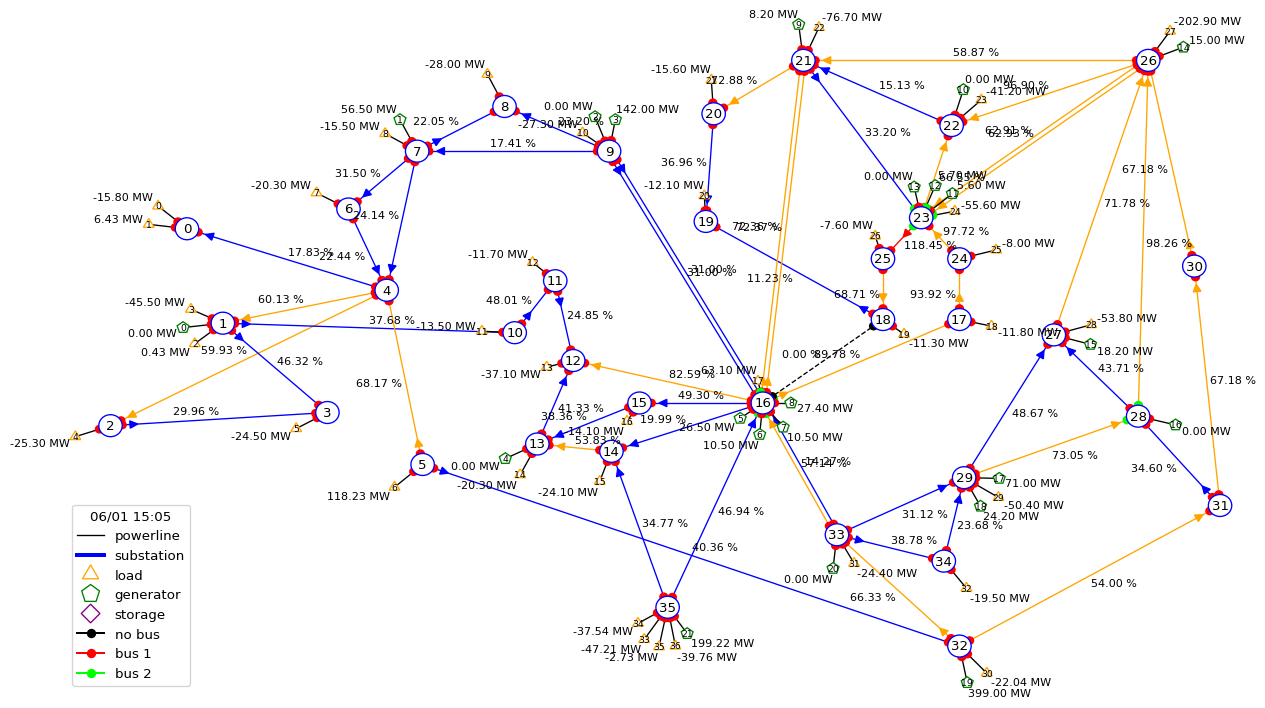

In [83]:
id_act=36
act=actions[id_act]
print(act)

obs_sim,*_=obs.simulate(act,time_step=0)

# if you want to plot all the observation
fig = plot_helper.plot_obs(obs_sim)
fig.show()

You can try to solve this last one yourself now.
**Good luck !**

# Running the automated agent

You can also run an automated version of this agent from l2rpn baselines. It will automatically choose an action from the expert results dataframe each time an overload occurs

In [84]:
from l2rpn_baselines.ExpertAgent import ExpertAgent
from l2rpn_baselines.ExpertAgent import evaluate

env = grid2op.make(param_folder, backend=LightSimBackend(max_iter=30))
env.seed(env_seed)

# reset the env to apply the seed and start to the desired scenario
obs = env.reset()

#loader = Grid2opObservationLoader(param_folder)
#env, obs, action_space = loader.get_observation(chronic_scenario= chronicscenario, timestep=timestep)
observation_space = env.observation_space
action_space=env.action_space

expert_agent=ExpertAgent(action_space,observation_space,
                 "expert",
                 gridName="IEEE118_R2")


#res = evaluate(env, nb_episode=1,logs_path="ExpertAgent")

2024-07-02 20:55:04.597937: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-07-02 20:55:04.598000: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
/home/marotant/dev/ExpertOp4Grid/venv_expert4grid/lib/python3.8/site-packages/lightsim2grid/gridmodel/_aux_add_trafo.py:67: UserWarning: There were some Nan in the pp_net.trafo["tap_step_degree"], they have been replaced by 0
  warnings.warn("There were some Nan in the pp_net.trafo[\"tap_step_degree\"], they have been replaced by 0")
/home/marotant/dev/ExpertOp4Grid/venv_expert4grid/lib/python3.8/site-packages/lightsim2grid/gridmodel/_aux_add_slack.py:114: UserWarning: We found either some slack coefficient to be < 0. or they were all 0.We set them all to 1.0 to avoid such issues
  warnings.warn("We found

In [86]:
done=False
reward=0
while not done:
    act=expert_agent.act(obs,reward)
    obs,reward,done,info=env.step(act)
    print("current timestep is: "+str(obs.current_step))
    

current timestep is: 1
current timestep is: 2
current timestep is: 3
current timestep is: 4
current timestep is: 5
current timestep is: 6
current timestep is: 7
current timestep is: 8
current timestep is: 9
current timestep is: 10
current timestep is: 11
current timestep is: 12
current timestep is: 13
current timestep is: 14
current timestep is: 15
current timestep is: 16
current timestep is: 17
current timestep is: 18
current timestep is: 19
current timestep is: 20
current timestep is: 21
current timestep is: 22
current timestep is: 23
current timestep is: 24
current timestep is: 25
current timestep is: 26
current timestep is: 27
current timestep is: 28
current timestep is: 29
current timestep is: 30
current timestep is: 31
current timestep is: 32
current timestep is: 33
current timestep is: 34
current timestep is: 35
current timestep is: 36
current timestep is: 37
current timestep is: 38
current timestep is: 39
current timestep is: 40
current timestep is: 41
current timestep is: 42
c

Constrained path created
In get_hubs(): c = 
################################################################
ConstrainedPath = [26, 22] 
Details: (amont: [], constrained_edge: (26, 22, 0), aval: [])
################################################################

##############################################################################
##########...........COMPUTE NEW NETWORK CHANGES..........####################
##############################################################################
########### Compute new network changes on node [22] with new topo [[1 2 2 1 2]] ###########
########### Compute new network changes on node [22] with new topo [[1 1 1 2 2]] ###########
########### Compute new network changes on node [22] with new topo [[1 2 2 1 1]] ###########
########### Compute new network changes on node [22] with new topo [[1 1 2 2 1]] ###########
########### Compute new network changes on node [22] with new topo [[1 2 1 1 2]] ###########
########### Compute new network 

Constrained path created
In get_hubs(): c = 
################################################################
ConstrainedPath = [16, 12, 11] 
Details: (amont: [], constrained_edge: (16, 12, 0), aval: [(12, 11, 0)])
################################################################

##############################################################################
##########...........COMPUTE NEW NETWORK CHANGES..........####################
##############################################################################
########### Compute new network changes on node [16] with new topo [[1 1 1 1 2 1 1 1 2 1 2 1 1 1 2 2 1]] ###########
########### Compute new network changes on node [16] with new topo [[1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1]] ###########
########### Compute new network changes on node [16] with new topo [[1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 2 1]] ###########
########### Compute new network changes on node [16] with new topo [[1 1 1 1 2 1 1 1 2 1 1 1 1 1 2 2 1]] ###########
########### Co

Constrained path created
In get_hubs(): c = 
################################################################
ConstrainedPath = [16, 14, 13, 12] 
Details: (amont: [(16, 14, 0)], constrained_edge: (14, 13, 0), aval: [(13, 12, 0)])
################################################################

##############################################################################
##########...........COMPUTE NEW NETWORK CHANGES..........####################
##############################################################################
########### Compute new network changes on node [16] with new topo [[1 1 1 1 2 1 1 1 2 1 1 1 2 1 2 1 1]] ###########
########### Compute new network changes on node [16] with new topo [[1 1 1 1 2 1 1 1 1 1 1 1 2 1 2 1 1]] ###########
########### Compute new network changes on node [16] with new topo [[1 1 1 1 2 1 1 1 2 1 1 2 2 1 2 1 1]] ###########
########### Compute new network changes on node [16] with new topo [[1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1]] ###########

Constrained path created
In get_hubs(): c = 
################################################################
ConstrainedPath = [16, 14, 13] 
Details: (amont: [(16, 14, 0)], constrained_edge: (14, 13, 0), aval: [])
################################################################

##############################################################################
##########...........COMPUTE NEW NETWORK CHANGES..........####################
##############################################################################
########### Compute new network changes on node [16] with new topo [[1 1 1 1 2 2 2 2 2 1 2 2 2 2 1 1 1]] ###########
########### Compute new network changes on node [16] with new topo [[1 1 1 1 2 1 2 2 2 1 2 1 2 2 1 1 1]] ###########
########### Compute new network changes on node [16] with new topo [[1 1 1 1 2 1 1 2 2 1 1 2 2 2 1 2 1]] ###########
########### Compute new network changes on node [16] with new topo [[1 1 1 1 2 1 2 2 1 2 1 2 2 1 1 2 1]] ###########
########### Co

Constrained path created
In get_hubs(): c = 
################################################################
ConstrainedPath = [31, 28, 26] 
Details: (amont: [(31, 28, 0)], constrained_edge: (28, 26, 0), aval: [])
################################################################

##############################################################################
##########...........COMPUTE NEW NETWORK CHANGES..........####################
##############################################################################
########### Compute new network changes on node [26] with new topo [[1 2 2 1 2 2 2 2 2]] ###########
########### Compute new network changes on node [26] with new topo [[1 2 2 1 2 2 1 2 2]] ###########
########### Compute new network changes on node [26] with new topo [[1 2 2 1 2 2 1 1 2]] ###########
########### Compute new network changes on node [26] with new topo [[1 2 2 1 2 2 2 1 2]] ###########
########### Compute new network changes on node [26] with new topo [[1 2 2 1 1

Constrained path created
In get_hubs(): c = 
################################################################
ConstrainedPath = [31, 28, 26] 
Details: (amont: [(31, 28, 0)], constrained_edge: (28, 26, 0), aval: [])
################################################################

##############################################################################
##########...........COMPUTE NEW NETWORK CHANGES..........####################
##############################################################################
########### Compute new network changes on node [26] with new topo [[1 2 2 1 2 2 1 2 2]] ###########
########### Compute new network changes on node [26] with new topo [[1 2 2 1 2 2 2 2 2]] ###########
########### Compute new network changes on node [26] with new topo [[1 1 1 2 1 1 2 1 1]] ###########
########### Compute new network changes on node [26] with new topo [[1 1 1 2 1 1 1 2 1]] ###########
########### Compute new network changes on node [26] with new topo [[1 2 2 1 2

current timestep is: 395
current timestep is: 396
current timestep is: 397
current timestep is: 398
current timestep is: 399
current timestep is: 400
current timestep is: 401
current timestep is: 402
current timestep is: 403
current timestep is: 404
current timestep is: 405
current timestep is: 406
current timestep is: 407
current timestep is: 408
current timestep is: 409
current timestep is: 410
current timestep is: 411
current timestep is: 412
current timestep is: 413
current timestep is: 414
current timestep is: 415
Number of generators of the powergrid: 22
Number of loads of the powergrid: 37
Number of powerline of the powergrid: 59
Number of elements connected to each substations in the powergrid: [ 3  6  3  3  6  3  3  6  3  7  3  3  4  5  4  3 17  3  4  3  3  8  5 10
  3  3  9  5  5  7  2  3  5  7  3  7]
Total number of elements: 177
    idx_or  idx_ex  init_flows  swapped  new_flows  new_flows_swapped  \
0        2       3       3.056    False      3.908              False   
1

Constrained path created
In get_hubs(): c = 
################################################################
ConstrainedPath = [16, 12, 11] 
Details: (amont: [], constrained_edge: (16, 12, 0), aval: [(12, 11, 0)])
################################################################

##############################################################################
##########...........COMPUTE NEW NETWORK CHANGES..........####################
##############################################################################
########### Compute new network changes on node [16] with new topo [[1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1]] ###########
########### Compute new network changes on node [16] with new topo [[1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 2 1]] ###########
########### Compute new network changes on node [16] with new topo [[1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 2 1]] ###########
########### Compute new network changes on node [16] with new topo [[1 1 1 1 2 1 1 1 2 1 1 1 1 1 2 2 1]] ###########
########### Co

current timestep is: 518
current timestep is: 519
current timestep is: 520
current timestep is: 521
current timestep is: 522
current timestep is: 523
current timestep is: 524
current timestep is: 525
current timestep is: 526
current timestep is: 527
current timestep is: 528
current timestep is: 529
current timestep is: 530
current timestep is: 531
current timestep is: 532
current timestep is: 533
current timestep is: 534
current timestep is: 535
current timestep is: 536
current timestep is: 537
current timestep is: 538
current timestep is: 539
current timestep is: 540
current timestep is: 541
current timestep is: 542
current timestep is: 543
current timestep is: 544
current timestep is: 545
current timestep is: 546
current timestep is: 547
current timestep is: 548
current timestep is: 549
current timestep is: 550
current timestep is: 551
current timestep is: 552
current timestep is: 553
current timestep is: 554
current timestep is: 555
current timestep is: 556
current timestep is: 557


Constrained path created
In get_hubs(): c = 
################################################################
ConstrainedPath = [16, 12, 11] 
Details: (amont: [], constrained_edge: (16, 12, 0), aval: [(12, 11, 0)])
################################################################

##############################################################################
##########...........COMPUTE NEW NETWORK CHANGES..........####################
##############################################################################
########### Compute new network changes on node [16] with new topo [[1 1 1 1 2 1 1 1 2 1 1 1 1 1 2 2 1]] ###########
########### Compute new network changes on node [16] with new topo [[1 1 1 1 2 1 1 1 1 1 2 1 1 1 2 2 1]] ###########
########### Compute new network changes on node [16] with new topo [[1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 2 1]] ###########
########### Compute new network changes on node [16] with new topo [[1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 2 1]] ###########
########### Co

Constrained path created
In get_hubs(): c = 
################################################################
ConstrainedPath = [31, 28, 26] 
Details: (amont: [(31, 28, 0)], constrained_edge: (28, 26, 0), aval: [])
################################################################

##############################################################################
##########...........COMPUTE NEW NETWORK CHANGES..........####################
##############################################################################
########### Compute new network changes on node [26] with new topo [[1 2 2 1 2 2 2 2 2]] ###########
########### Compute new network changes on node [26] with new topo [[1 2 2 1 2 2 1 2 2]] ###########
########### Compute new network changes on node [26] with new topo [[1 2 2 1 2 2 2 1 2]] ###########
########### Compute new network changes on node [26] with new topo [[1 2 2 1 2 2 1 1 2]] ###########
########### Compute new network changes on node [26] with new topo [[1 2 2 1 1

Constrained path created
In get_hubs(): c = 
################################################################
ConstrainedPath = [17, 24, 16, 33, 32, 23] 
Details: (amont: [(17, 24, 0), (16, 17, 0), (33, 16, 0), (32, 33, 0), (33, 16, 1)], constrained_edge: (24, 23, 0), aval: [])
################################################################

##############################################################################
##########...........COMPUTE NEW NETWORK CHANGES..........####################
##############################################################################
########### Compute new network changes on node [23] with new topo [[1 1 2 2 1 2 2 2 2 2]] ###########
########### Compute new network changes on node [23] with new topo [[1 1 2 2 1 2 2 1 2 2]] ###########
########### Compute new network changes on node [23] with new topo [[1 1 1 2 1 2 2 1 2 2]] ###########
########### Compute new network changes on node [23] with new topo [[1 1 1 2 1 2 2 2 2 2]] ###########
######

Constrained path created
In get_hubs(): c = 
################################################################
ConstrainedPath = [21, 23, 25, 18] 
Details: (amont: [(21, 23, 0)], constrained_edge: (23, 25, 0), aval: [(25, 18, 0)])
################################################################

##############################################################################
##########...........COMPUTE NEW NETWORK CHANGES..........####################
##############################################################################
########### Compute new network changes on node [21] with new topo [[1 2 1 2 1 1 1 1]] ###########
########### Compute new network changes on node [21] with new topo [[1 2 2 2 2 1 2 1]] ###########
########### Compute new network changes on node [21] with new topo [[1 2 1 2 2 1 1 1]] ###########
########### Compute new network changes on node [21] with new topo [[1 2 1 2 2 1 1 2]] ###########
########### Compute new network changes on node [21] with new topo [[1 

Constrained path created
In get_hubs(): c = 
################################################################
ConstrainedPath = [26, 22] 
Details: (amont: [], constrained_edge: (26, 22, 0), aval: [])
################################################################

##############################################################################
##########...........COMPUTE NEW NETWORK CHANGES..........####################
##############################################################################
########### Compute new network changes on node [22] with new topo [[1 2 2 1 2]] ###########
########### Compute new network changes on node [22] with new topo [[1 1 1 2 2]] ###########
########### Compute new network changes on node [22] with new topo [[1 2 2 1 1]] ###########
########### Compute new network changes on node [22] with new topo [[1 1 2 2 1]] ###########
########### Compute new network changes on node [22] with new topo [[1 2 1 1 2]] ###########
########### Compute new network 

Constrained path created
In get_hubs(): c = 
################################################################
ConstrainedPath = [21, 23, 25, 18] 
Details: (amont: [(21, 23, 0)], constrained_edge: (23, 25, 0), aval: [(25, 18, 0)])
################################################################
substation 18 is in cooldown and no action can be performed on it for now

##############################################################################
##########...........COMPUTE NEW NETWORK CHANGES..........####################
##############################################################################
########### Compute new network changes on node [21] with new topo [[1 2 1 2 1 1 1 1]] ###########
########### Compute new network changes on node [21] with new topo [[1 1 2 1 1 2 1 1]] ###########
########### Compute new network changes on node [21] with new topo [[1 2 2 2 1 1 1 2]] ###########
########### Compute new network changes on node [21] with new topo [[1 2 2 2 1 1 1 1]] #########

Constrained path created
In get_hubs(): c = 
################################################################
ConstrainedPath = [26, 22] 
Details: (amont: [], constrained_edge: (26, 22, 0), aval: [])
################################################################

##############################################################################
##########...........COMPUTE NEW NETWORK CHANGES..........####################
##############################################################################
########### Compute new network changes on node [22] with new topo [[1 2 2 1 2]] ###########
########### Compute new network changes on node [22] with new topo [[1 1 1 2 2]] ###########
########### Compute new network changes on node [22] with new topo [[1 2 2 1 1]] ###########
########### Compute new network changes on node [22] with new topo [[1 1 2 2 1]] ###########
########### Compute new network changes on node [22] with new topo [[1 2 1 1 2]] ###########
########### Compute new network 

Constrained path created
In get_hubs(): c = 
################################################################
ConstrainedPath = [21, 23, 26, 25, 18] 
Details: (amont: [(21, 23, 0), (26, 23, 1)], constrained_edge: (23, 25, 0), aval: [(25, 18, 0)])
################################################################
substation 18 is in cooldown and no action can be performed on it for now
substation 23 is in cooldown and no action can be performed on it for now

##############################################################################
##########...........COMPUTE NEW NETWORK CHANGES..........####################
##############################################################################
########### Compute new network changes on node [26] with new topo [[1 1 2 1 2 1 2 2 2]] ###########
########### Compute new network changes on node [26] with new topo [[1 1 2 2 2 1 1 2 2]] ###########
########### Compute new network changes on node [26] with new topo [[1 1 2 1 2 1 1 2 2]] ###########

Constrained path created
In get_hubs(): c = 
################################################################
ConstrainedPath = [21, 23, 26, 25, 18] 
Details: (amont: [(21, 23, 0), (26, 23, 1)], constrained_edge: (23, 25, 0), aval: [(25, 18, 0)])
################################################################
substation 18 is in cooldown and no action can be performed on it for now
substation 23 is in cooldown and no action can be performed on it for now

##############################################################################
##########...........COMPUTE NEW NETWORK CHANGES..........####################
##############################################################################
########### Compute new network changes on node [26] with new topo [[1 1 2 1 2 1 2 2 2]] ###########
########### Compute new network changes on node [26] with new topo [[1 1 2 2 2 1 1 2 2]] ###########
########### Compute new network changes on node [26] with new topo [[1 1 2 1 2 1 1 2 2]] ###########

/home/marotant/dev/ExpertOp4Grid/alphaDeesp/core/grid2op/Grid2opSimulation.py:279: RuntimeWarning: divide by zero encountered in scalar divide
  efficacity = -fabs(delta_flow / virtual_obs.rho[self.ltc[0]])
/home/marotant/dev/ExpertOp4Grid/alphaDeesp/core/grid2op/Grid2opSimulation.py:279: RuntimeWarning: divide by zero encountered in scalar divide
  efficacity = -fabs(delta_flow / virtual_obs.rho[self.ltc[0]])
/home/marotant/dev/ExpertOp4Grid/alphaDeesp/core/grid2op/Grid2opSimulation.py:279: RuntimeWarning: divide by zero encountered in scalar divide
  efficacity = -fabs(delta_flow / virtual_obs.rho[self.ltc[0]])
/home/marotant/dev/ExpertOp4Grid/alphaDeesp/core/grid2op/Grid2opSimulation.py:279: RuntimeWarning: divide by zero encountered in scalar divide
  efficacity = -fabs(delta_flow / virtual_obs.rho[self.ltc[0]])
/home/marotant/dev/ExpertOp4Grid/alphaDeesp/core/grid2op/Grid2opSimulation.py:279: RuntimeWarning: divide by zero encountered in scalar divide
  efficacity = -fabs(delta_fl

current timestep is: 781
Number of generators of the powergrid: 22
Number of loads of the powergrid: 37
Number of powerline of the powergrid: 59
Number of elements connected to each substations in the powergrid: [ 3  6  3  3  6  3  3  6  3  7  3  3  4  5  4  3 17  3  4  3  3  8  5 10
  3  3  9  5  5  7  2  3  5  7  3  7]
Total number of elements: 177
    idx_or  idx_ex  init_flows  swapped  new_flows  new_flows_swapped  \
0        2       3       2.839    False      0.000              False   
1        4       2      27.039     True     -0.000              False   
2        4       0       5.030     True     -0.000              False   
3        1       3      20.804    False      0.000              False   
4        4       1      91.162     True     -0.000              False   
5        6       4       7.633     True     -0.000              False   
6        7       4      13.929     True     -0.000              False   
7        7       6      26.901     True     -0.000             

Constrained path created
In get_hubs(): c = 
################################################################
ConstrainedPath = [21, 20, 16, 9, 33, 32, 5, 35, 26, 27, 28, 29, 34, 31, 30, 19, 18, 25] 
Details: (amont: [(21, 20, 0), (16, 21, 0), (9, 16, 0), (9, 16, 1), (33, 16, 0), (32, 33, 0), (5, 32, 0), (33, 16, 1), (35, 16, 0), (16, 21, 1), (26, 21, 0), (27, 26, 0), (28, 27, 0), (29, 28, 0), (33, 29, 0), (34, 29, 0), (33, 34, 0), (31, 28, 0), (32, 31, 0), (29, 27, 0), (30, 26, 0), (31, 30, 0)], constrained_edge: (20, 19, 0), aval: [(19, 18, 0), (18, 25, 0)])
################################################################

##############################################################################
##########...........COMPUTE NEW NETWORK CHANGES..........####################
##############################################################################
--------------------------------------------------------------------------------------------
----------------------------------- E

Constrained path created
In get_hubs(): c = 
################################################################
ConstrainedPath = [17, 24, 16, 33, 32, 23, 22] 
Details: (amont: [(17, 24, 0), (16, 17, 0), (33, 16, 0), (32, 33, 0), (33, 16, 1)], constrained_edge: (24, 23, 0), aval: [(23, 22, 0)])
################################################################
substation 16 is in cooldown and no action can be performed on it for now

##############################################################################
##########...........COMPUTE NEW NETWORK CHANGES..........####################
##############################################################################
########### Compute new network changes on node [23] with new topo [[1 1 1 1 1 1 1 1 1 1]] ###########
########### Compute new network changes on node [23] with new topo [[1 1 2 1 2 1 1 2 1 1]] ###########
########### Compute new network changes on node [23] with new topo [[1 1 2 2 1 2 2 2 2 2]] ###########
########### Compute 

Constrained path created
In get_hubs(): c = 
################################################################
ConstrainedPath = [26, 22] 
Details: (amont: [], constrained_edge: (26, 22, 0), aval: [])
################################################################
substation 23 is in cooldown and no action can be performed on it for now

##############################################################################
##########...........COMPUTE NEW NETWORK CHANGES..........####################
##############################################################################
########### Compute new network changes on node [22] with new topo [[1 2 2 1 2]] ###########
########### Compute new network changes on node [22] with new topo [[1 1 1 2 2]] ###########
########### Compute new network changes on node [22] with new topo [[1 2 2 1 1]] ###########
########### Compute new network changes on node [22] with new topo [[1 1 2 2 1]] ###########
########### Compute new network changes on node [22

Constrained path created
In get_hubs(): c = 
################################################################
ConstrainedPath = [16, 21, 9, 33, 32, 5, 35, 26, 23, 24, 17, 27, 28, 29, 34, 31, 30, 20, 19, 18] 
Details: (amont: [(16, 21, 0), (9, 16, 0), (9, 16, 1), (33, 16, 0), (32, 33, 0), (5, 32, 0), (33, 16, 1), (35, 16, 0), (16, 21, 1), (26, 21, 0), (23, 26, 0), (21, 23, 0), (24, 23, 0), (17, 24, 0), (16, 17, 0), (26, 23, 0), (27, 26, 0), (28, 27, 0), (29, 28, 0), (33, 29, 0), (34, 29, 0), (33, 34, 0), (31, 28, 0), (32, 31, 0), (29, 27, 0), (28, 26, 0), (30, 26, 0), (31, 30, 0)], constrained_edge: (21, 20, 0), aval: [(20, 19, 0), (19, 18, 0)])
################################################################

##############################################################################
##########...........COMPUTE NEW NETWORK CHANGES..........####################
##############################################################################
--------------------------------------------

It ends at timestep 784 after this very tough period that only the winning agent in 2021 was able to overcome!

# Conclusion

In this notebook you have seen how to use the expert system for different kind of overloads on a larger grid area. It shows how effective the overload distribution graph can be, either in an assistant manner or more automated agent. 

Make good use of it, may the force be with you !